In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import array

In [2]:
%cd '/home/pankhuri/Downloads'

/home/pankhuri/Downloads


In [3]:
df=np.loadtxt('obs_122555698_MBN.dat', dtype=str)
dat=Table(df[1:], names=df[0])
of=(np.array(dat['nu'], dtype=float))/1000000
nof=np.array(dat['n'], dtype=float)
lof=np.array(dat['l'], dtype=float)
error=np.array(dat['e(nu)'], dtype=float)/1000000

In [4]:
dat

<Table length=10>
 l    n      nu   e(nu)
str7 str7   str7   str7
---- ---- ------- -----
   0   15 1142.23  2.04
   0   16 1211.30  0.56
   0   17 1282.05  1.91
   0   18 1351.17  0.43
   1   15 1171.80  1.48
   1   16 1243.36  0.86
   1   17 1312.27  1.13
   1   18 1380.81  0.51
   2   15 1206.95  2.04
   2   17 1348.67  2.26

# Directory names

In [5]:
directory= '/home/pankhuri/astero/d1910/c0000'
os.chdir(directory)
pre_string='d1910c0000'
z=os.listdir(directory) #extracting the z folder names
new=[os.path.join(directory,i) for i in z] #extracting the y folder names from the z ones
y_string=[]
Y=[]
for j in new:
    y=os.listdir(j)
    Y.append(y)
    y_string.append([os.path.join(j,k) for k in y]) #appending it to the new directory
y_string=[item for sublist in y_string for item in sublist]
m_string=[]  #extraxting mass folders 
final=[]
M=[]
for q in y_string:
    m_string=(os.listdir(q))
    M.append(m_string)
    final.append([os.path.join(q,m) for m in m_string])
final=[item for sublist in final for item in sublist] #final directory name

In [6]:
final

['/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0115',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0111',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0127',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0118',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0113',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0130',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0119',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0123',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0124',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0125',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0121',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0122',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0110',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0114',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0116',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0126',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/m0129',
 '/home/pankhuri/astero/d1910/c0000/z2307/y2861/

# File name

In [7]:
all_files=[] #extracting all the files in the directory 
freq_files=[]
for files in final:
    os.chdir(files)
    all_files.append(os.listdir(files))
freq_files=[] #separating the frequency and models files 
models=[]
for j in range(len(all_files)):
    freq_files.append([fi for fi in all_files[j] if fi.endswith('.freq')])
    models.append([fi for fi in all_files[j] if fi.endswith('.models')])
models=[item for sublist in models for item in sublist]

ages=[] #extracting ages from models to add in the file name
model_data=[]
for d in range(len(models)):
    os.chdir(final[d])
    model_data.append(np.loadtxt(models[d],skiprows=6))
    ages.append(model_data[d][:,2])
    
nested_list =Y
flat_list = [item for sublist in nested_list for item in sublist] #flattening our y string list
#making the ages in correct string format
age_string = [['a' + str(int(age / 1000)).zfill(8) for age in ages[j]] for j in range(len(ages))] 
c=[]
for p in range(len(z)):
    for q in range(len(M[p])):
        c.append([pre_string+z[p]+flat_list[p]+M[p][q]])

freq_list=[] #final names of all the frequencies as generated from the models file data
for i in range(len(age_string)):
    freq_list.append([c[i][0]+age_string[i][j]+'.freq' for j in range(len(age_string[i]))])

In [8]:
freq_list

[['d1910c0000z2307y2861m0115a05738619.freq',
  'd1910c0000z2307y2861m0115a05739645.freq',
  'd1910c0000z2307y2861m0115a05740877.freq',
  'd1910c0000z2307y2861m0115a05741862.freq',
  'd1910c0000z2307y2861m0115a05742724.freq',
  'd1910c0000z2307y2861m0115a05743521.freq',
  'd1910c0000z2307y2861m0115a05744275.freq',
  'd1910c0000z2307y2861m0115a05744997.freq',
  'd1910c0000z2307y2861m0115a05745695.freq',
  'd1910c0000z2307y2861m0115a05746374.freq',
  'd1910c0000z2307y2861m0115a05747037.freq',
  'd1910c0000z2307y2861m0115a05747685.freq',
  'd1910c0000z2307y2861m0115a05748319.freq',
  'd1910c0000z2307y2861m0115a05748940.freq',
  'd1910c0000z2307y2861m0115a05749549.freq',
  'd1910c0000z2307y2861m0115a05750144.freq',
  'd1910c0000z2307y2861m0115a05750728.freq',
  'd1910c0000z2307y2861m0115a05751301.freq',
  'd1910c0000z2307y2861m0115a05751861.freq',
  'd1910c0000z2307y2861m0115a05752410.freq',
  'd1910c0000z2307y2861m0115a05752948.freq',
  'd1910c0000z2307y2861m0115a05753475.freq',
  'd1910c0

# Testing the files 

In [9]:
def correct_files(i):
    os.chdir(final[i])
    wrong_files=[]
    l=[]
    f=[]
    star_age=[]
    star_mass=[]
    data=model_data[i]
    log_g=[]
    log_Teff=[]
    model_number=[]
    surface_h1=[]
    surface_he4=[]
    teff=[]
    z=[]
    log_l=[]
    for index, file in enumerate(freq_list[i]):
        try:                                     #using try except to append the files that match
            new_files = np.loadtxt(file)
            L=new_files[:,0]
            l.append(L)
            F=new_files[:,4]
            f.append(F)
            new.append(file)
            star_age.append(data[index,2])
            star_mass.append(data[index,4])
            log_g.append(data[index,48])
            log_Teff.append(data[index,45])
            model_number.append(data[index,0])
            surface_h1.append(data[index,62])
            surface_he4.append(data[index,63])
            log_l.append(data[index,46])
        except Exception as e:
            wrong_files.append(file)
    return l,f,star_age,log_g,log_Teff,model_number,surface_h1,surface_he4,log_l,star_mass[0]

In [10]:
# Preallocate lists to store the useful data for calculating probability
f = []
l = []
star_age = []
log_g = []
log_Teff = []
model_number = []
surface_h1 = []
surface_he4 = []
teff = []
z = []
log_l = []
star_mass = []

# Loop through the frequency list and unpack the results from correct_files(q) only once
for q in range(len(freq_list)):
    # Call correct_files(q) once and unpack the results into variables
    l_value, f_value, star_age_value, log_g_value, log_Teff_value, model_number_value, surface_h1_value, surface_he4_value, log_l_value, star_mass_value = correct_files(q)

    # Append the values to the corresponding lists
    f.append(f_value)
    l.append(l_value)
    star_age.append(star_age_value)
    star_mass.append(star_mass_value)
    log_g.append(log_g_value)
    log_Teff.append(log_Teff_value)
    model_number.append(model_number_value)
    surface_h1.append(surface_h1_value)
    surface_he4.append(surface_he4_value)
    log_l.append(log_l_value)


# Posterior 

In [11]:
# NON-SEISMIC DATA
t_spec=((5640+5940)/2)
sigma_t_spec=((5940-5640)/2)
sigma_Fe_spec=(.2+.02)/2
Fe_spec=(-.02+.2)/2
log_g_spec=(4.05+4.17)/2
sigma_g_spec=(4.17-4.05)/2

In [12]:
  def lik(h):
    def like(s):
        mf=f[h][s]/1000000
        lf=l[h][s]
        q=[]
        d=[]
        for b in range(len(of)):
            p=[]
            for i in range(len(mf)):
                if (lof[b]==lf[i]):
                    p.append((1/len(mf))*((1/(np.sqrt(2*np.pi*error[b]**2)))*np.exp(-((of[b]-mf[i])**2)/(2*error[b]**2))))
            q.append(np.sum(p))
        d.append(np.prod(q))
        return d

    likelihood=[]
    for m in range(len(f[h])):
        likelihood.append(like(m))
    likes=[likelihood[i][0] for i in range(len(f[h]))] #flattening the likelihood array
    
    logTeff=np.array(log_Teff[h])
    logg=np.array(log_g[h])
    surfaceh1=np.array(surface_h1[h])
    surfacehe4=np.array(surface_he4[h])
    teff=10**logTeff
    z=np.log10(1-surfaceh1-surfacehe4)-np.log10(.0196) #metallicity of sun=.0196
    prior_t=np.exp((-(t_spec-teff)**2)/(2*sigma_t_spec**2))
    prior_f=np.exp((-(Fe_spec-z)**2)/(2*sigma_Fe_spec**2))
    prior_g=np.exp((-(log_g_spec-logg)**2)/(2*sigma_g_spec**2))
    prior_t_norm=prior_t/np.sum(prior_t)
    prior_f_norm=prior_f/np.sum(prior_f)
    prior_g_norm=prior_g/np.sum(prior_g)
    prior_model=prior_f_norm*prior_g_norm*prior_t_norm
    
    posterior=[]
    for i in range(len(f[h])):
        posterior.append(likes[i]*prior_model[i])
    
    return likes,prior_model,posterior

In [13]:
post=[]
for i in range(len(f)):
    post.append(lik(i)[2])

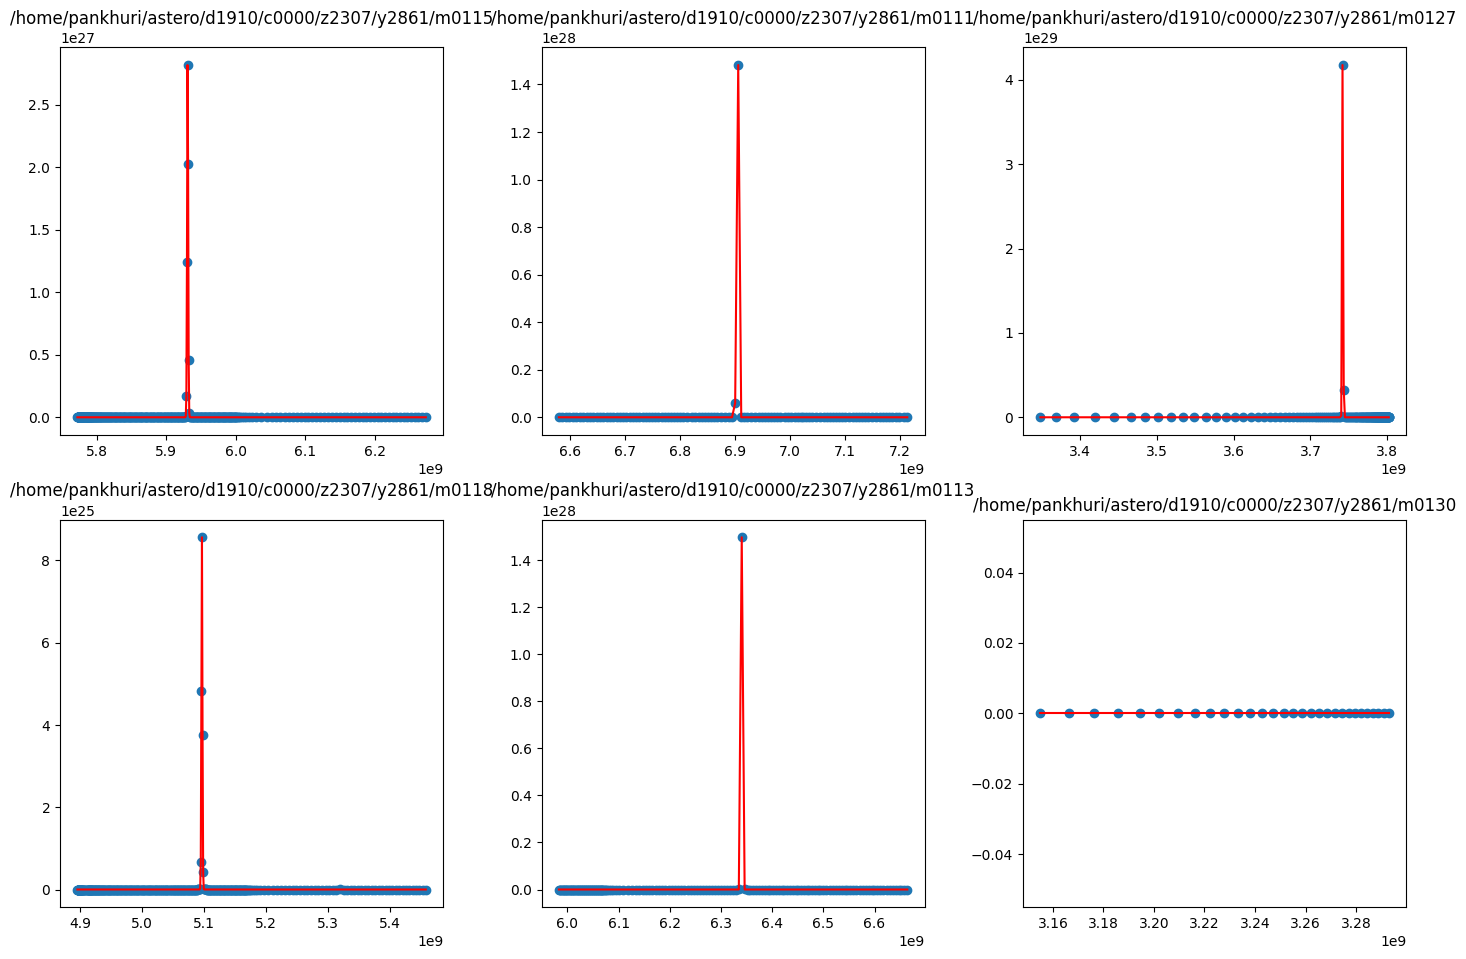

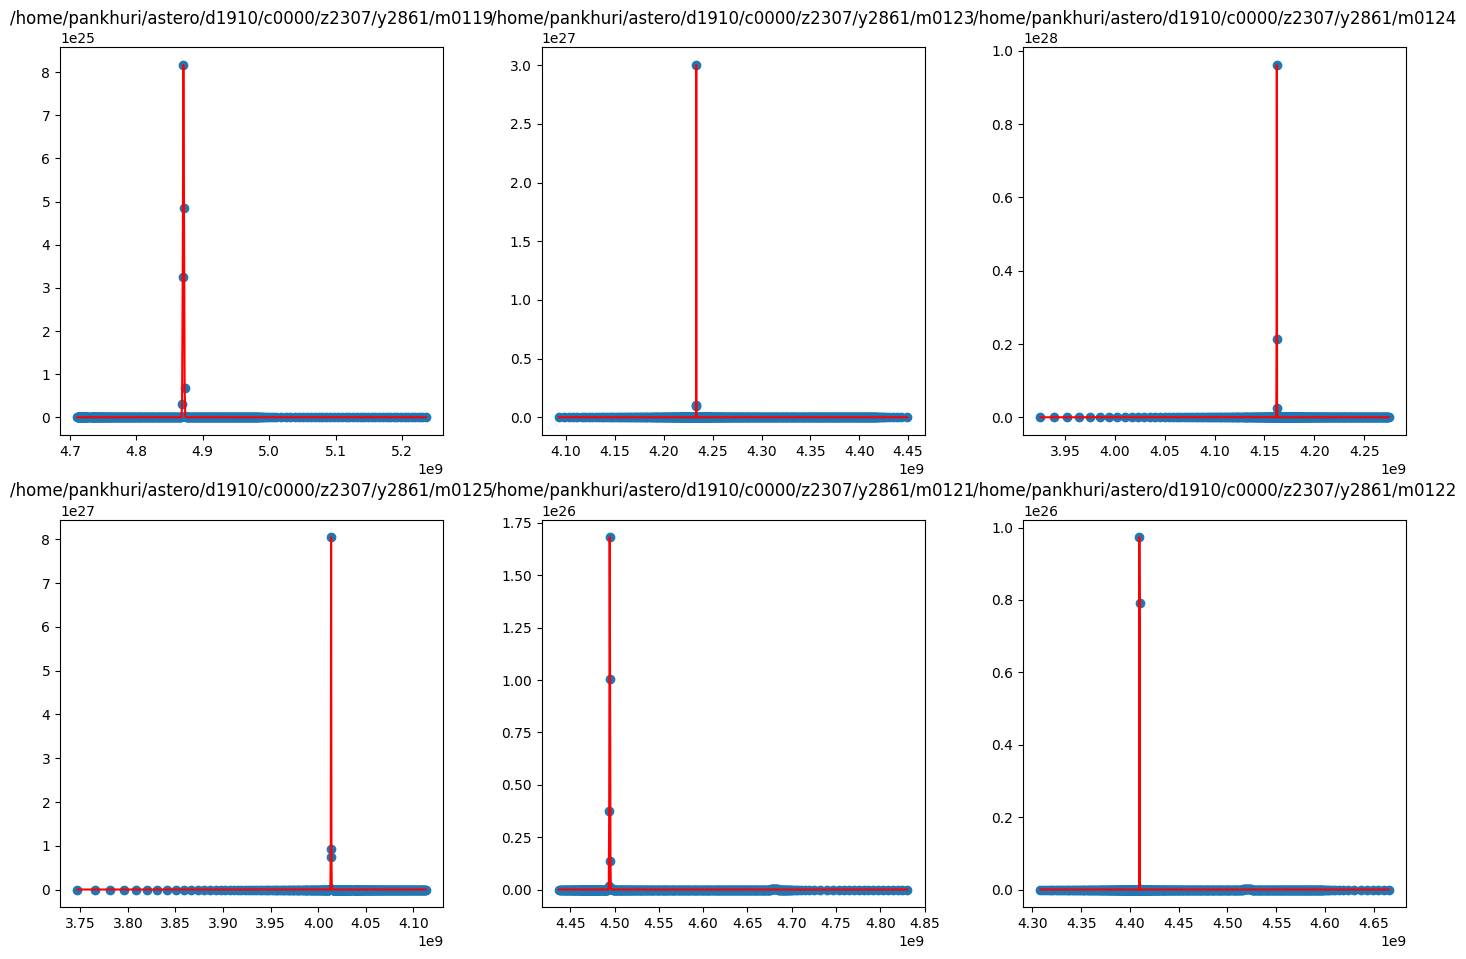

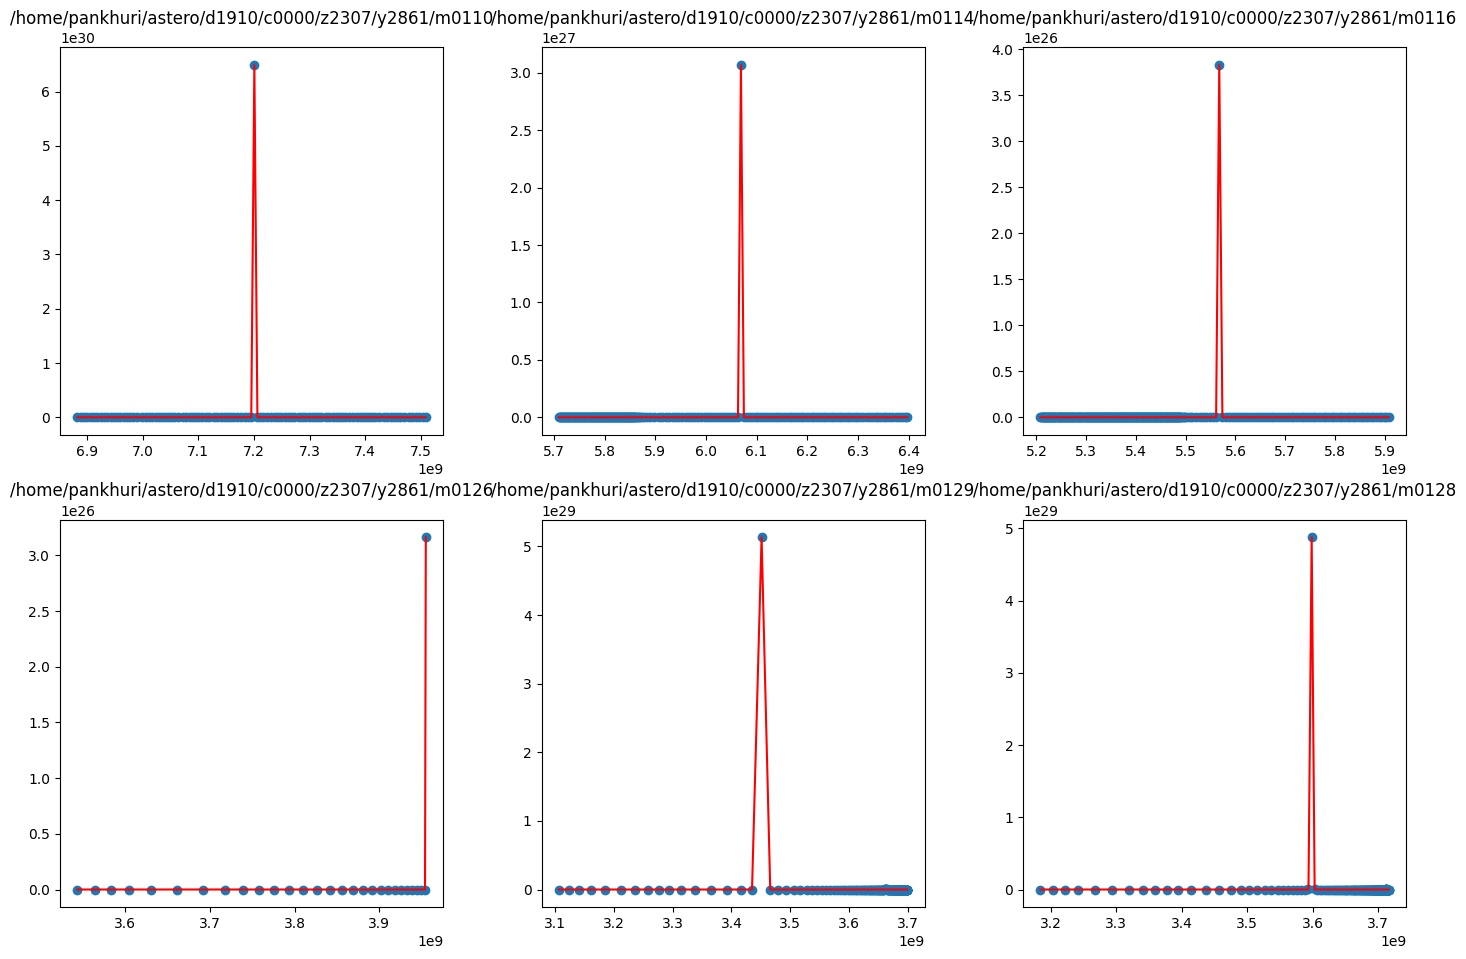

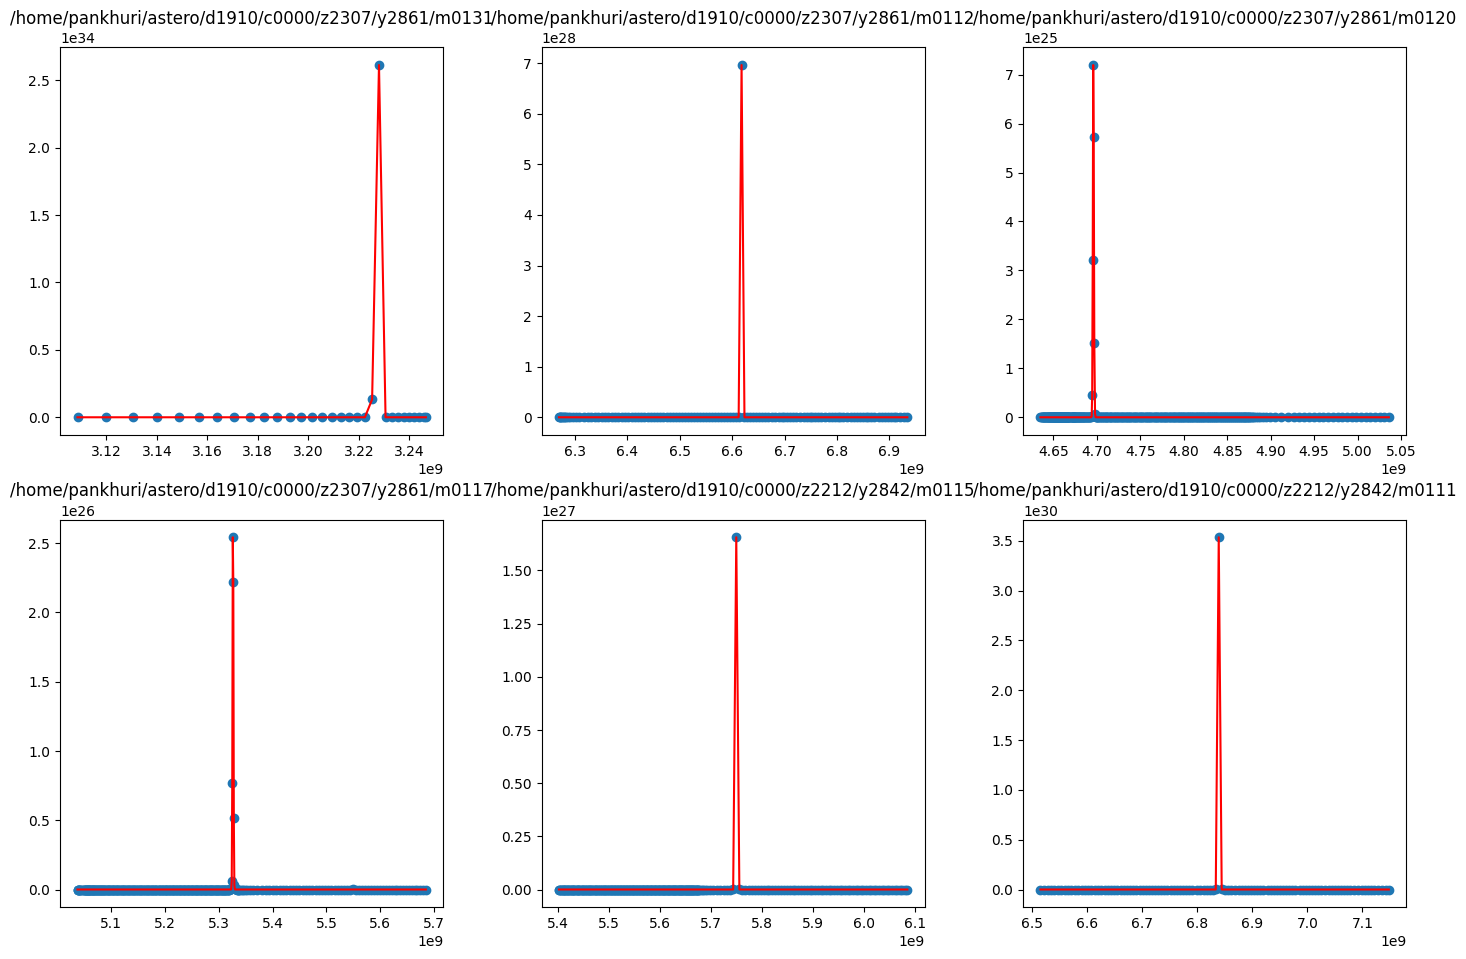

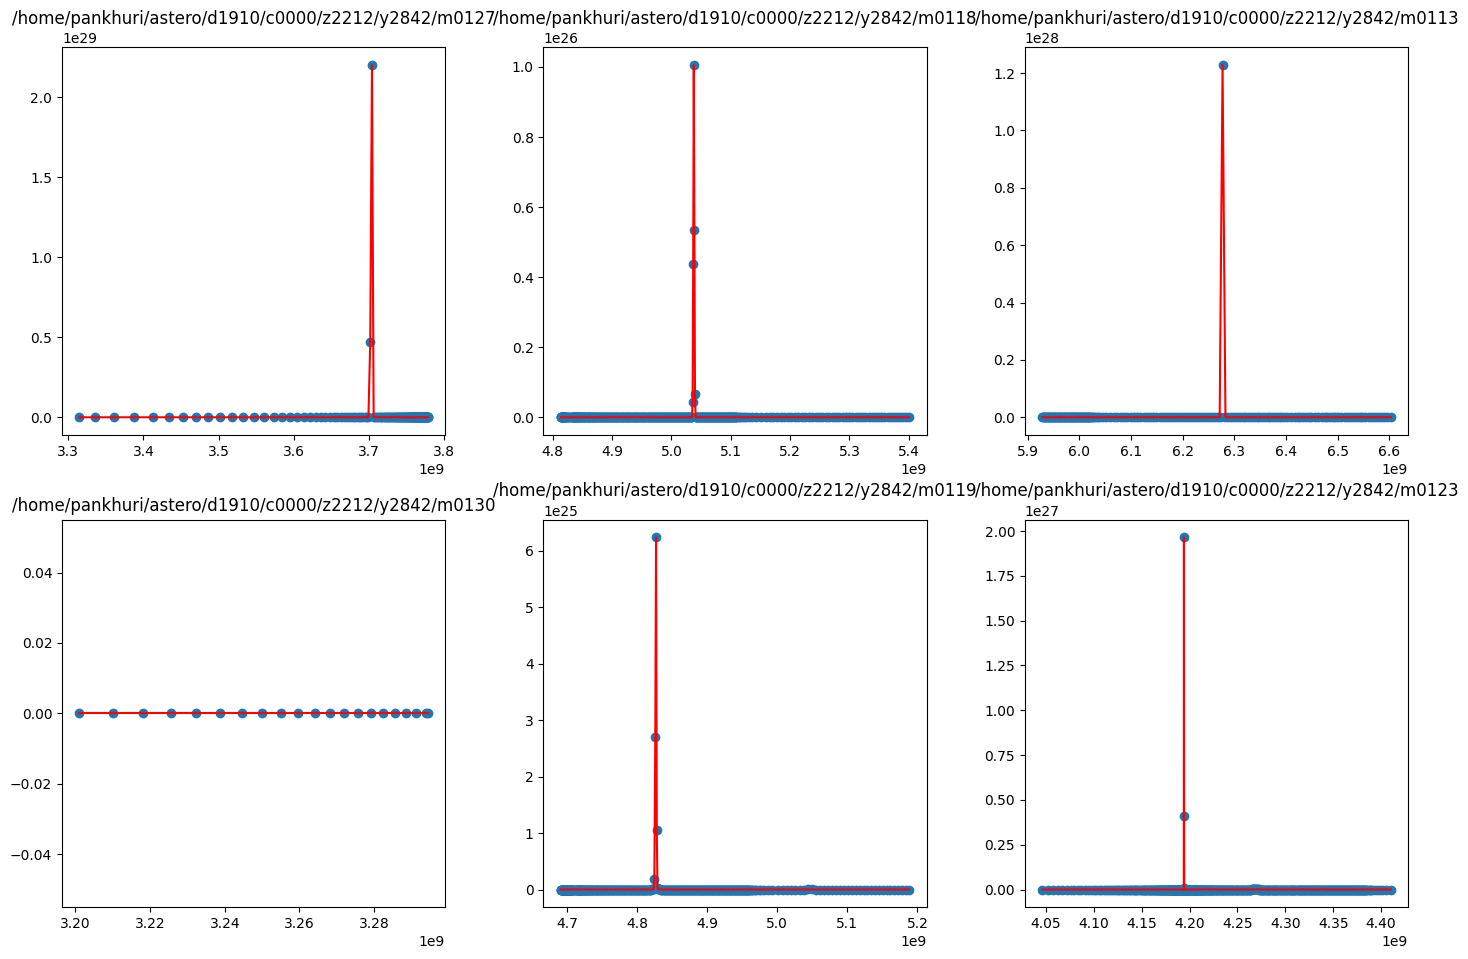

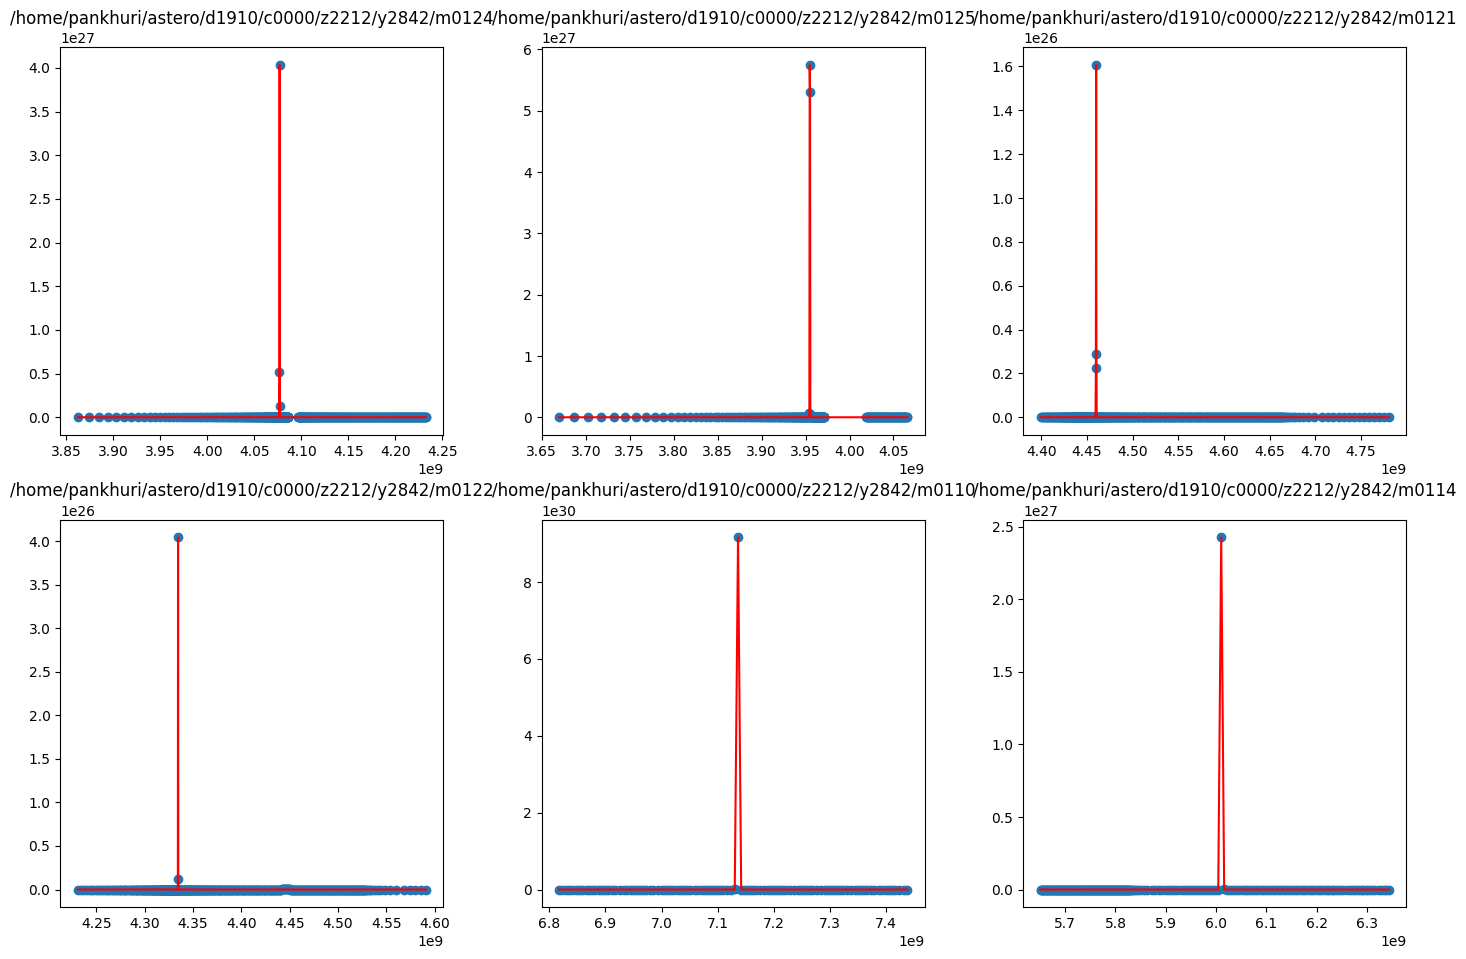

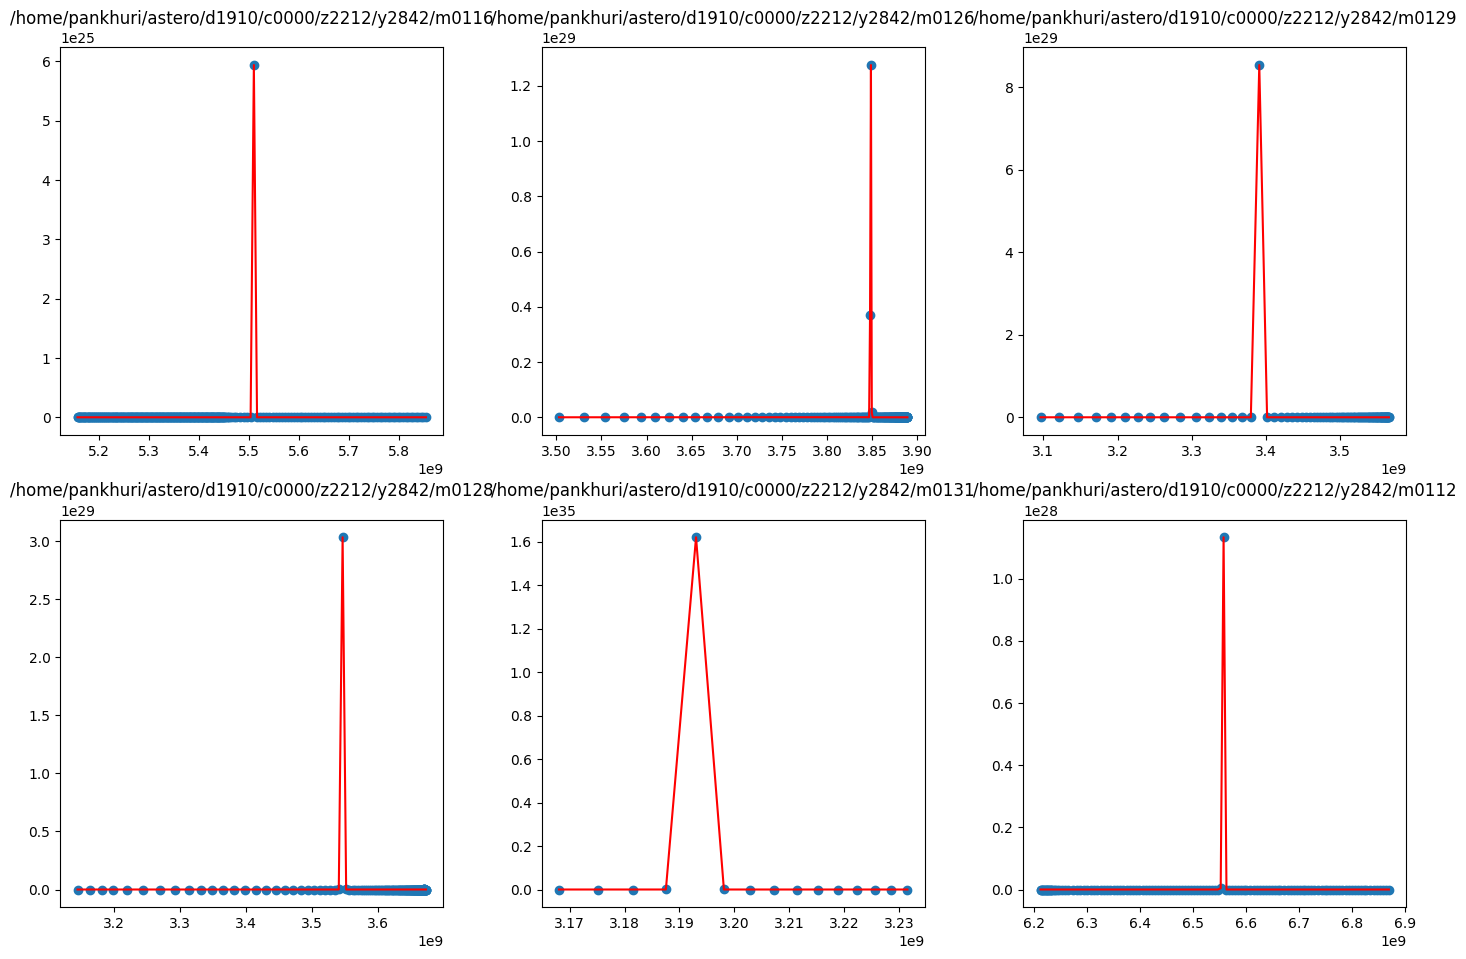

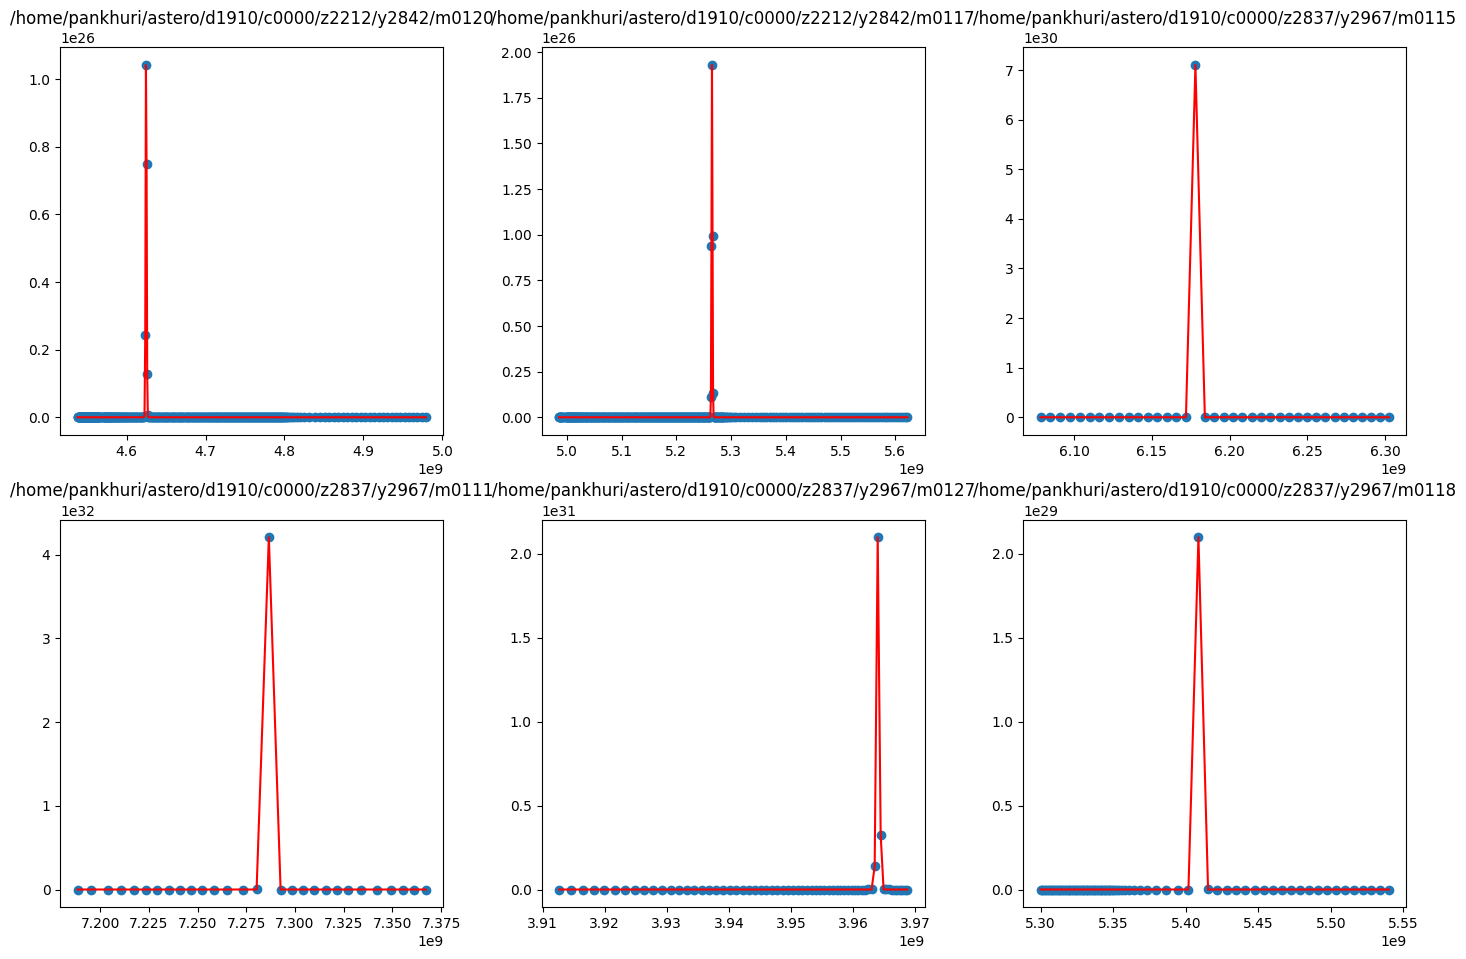

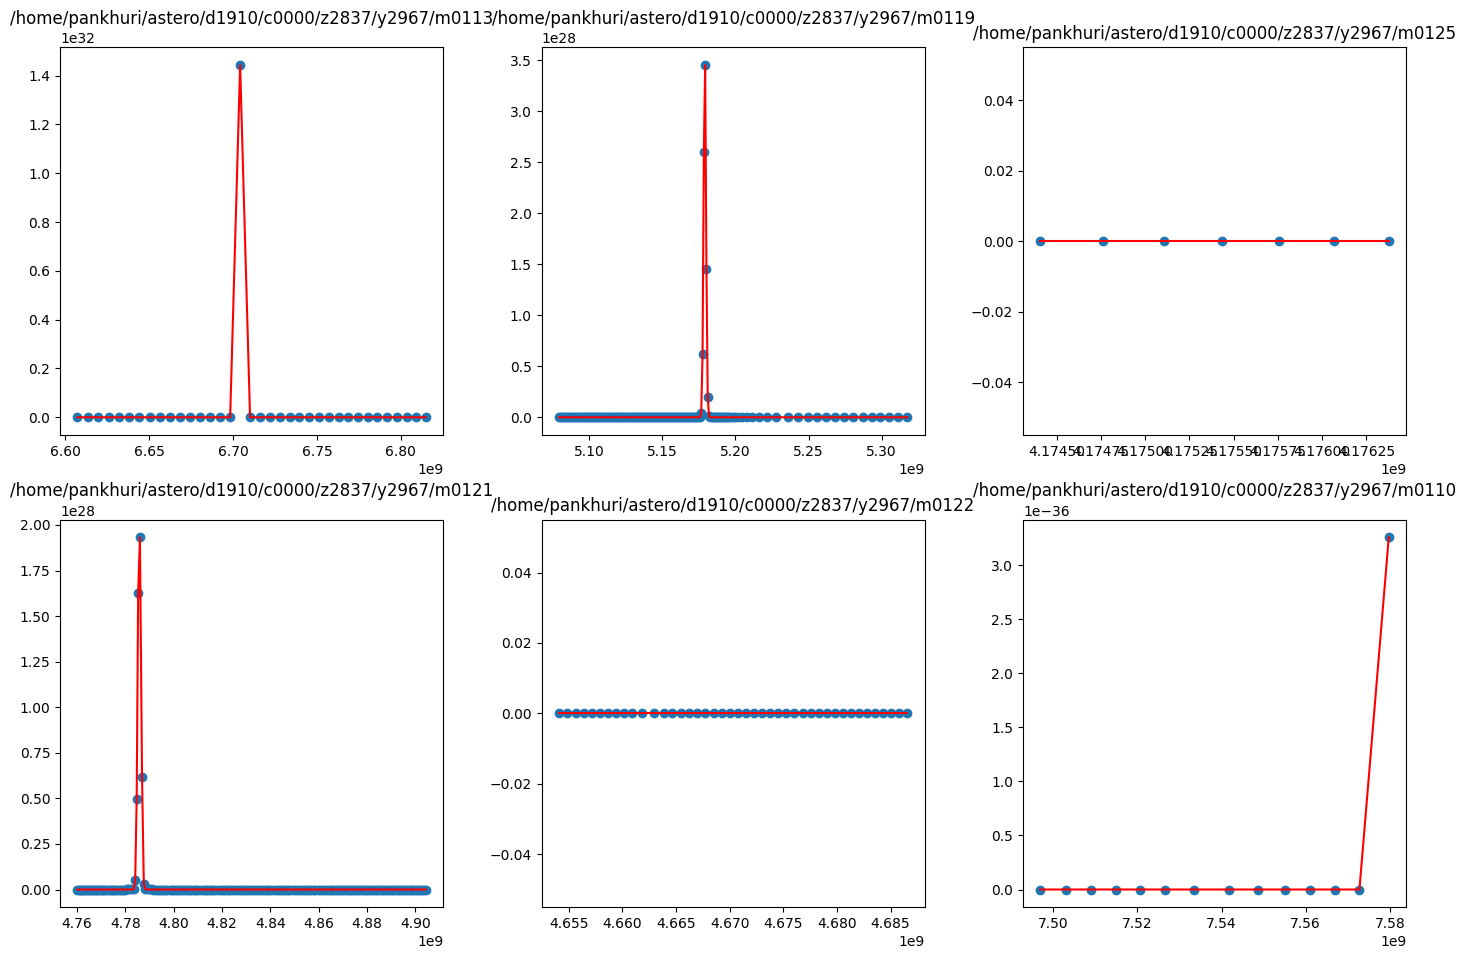

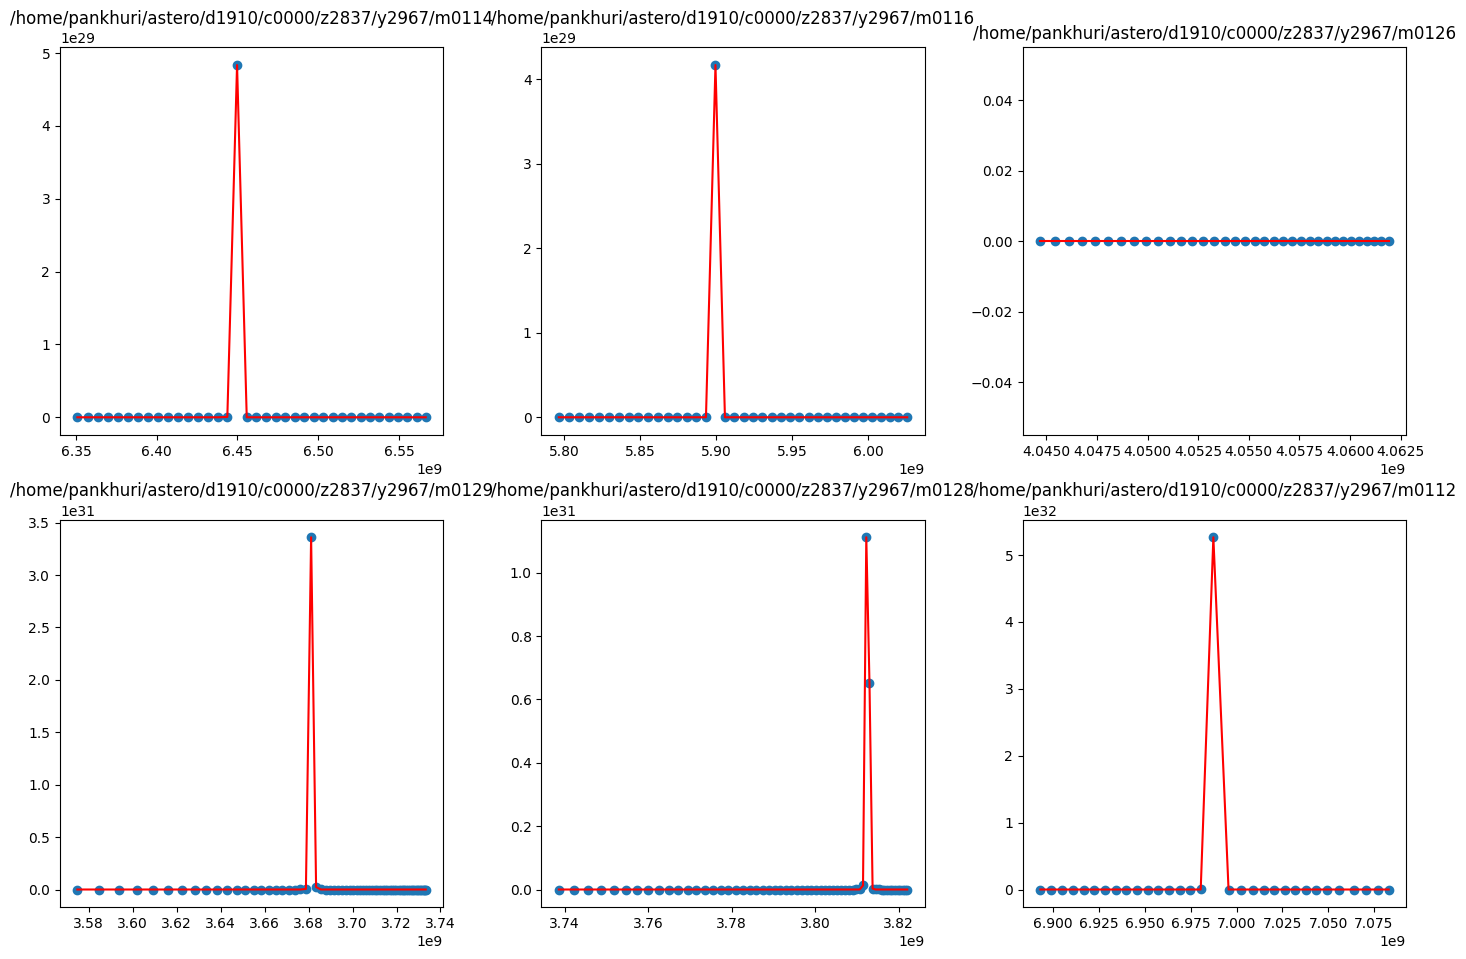

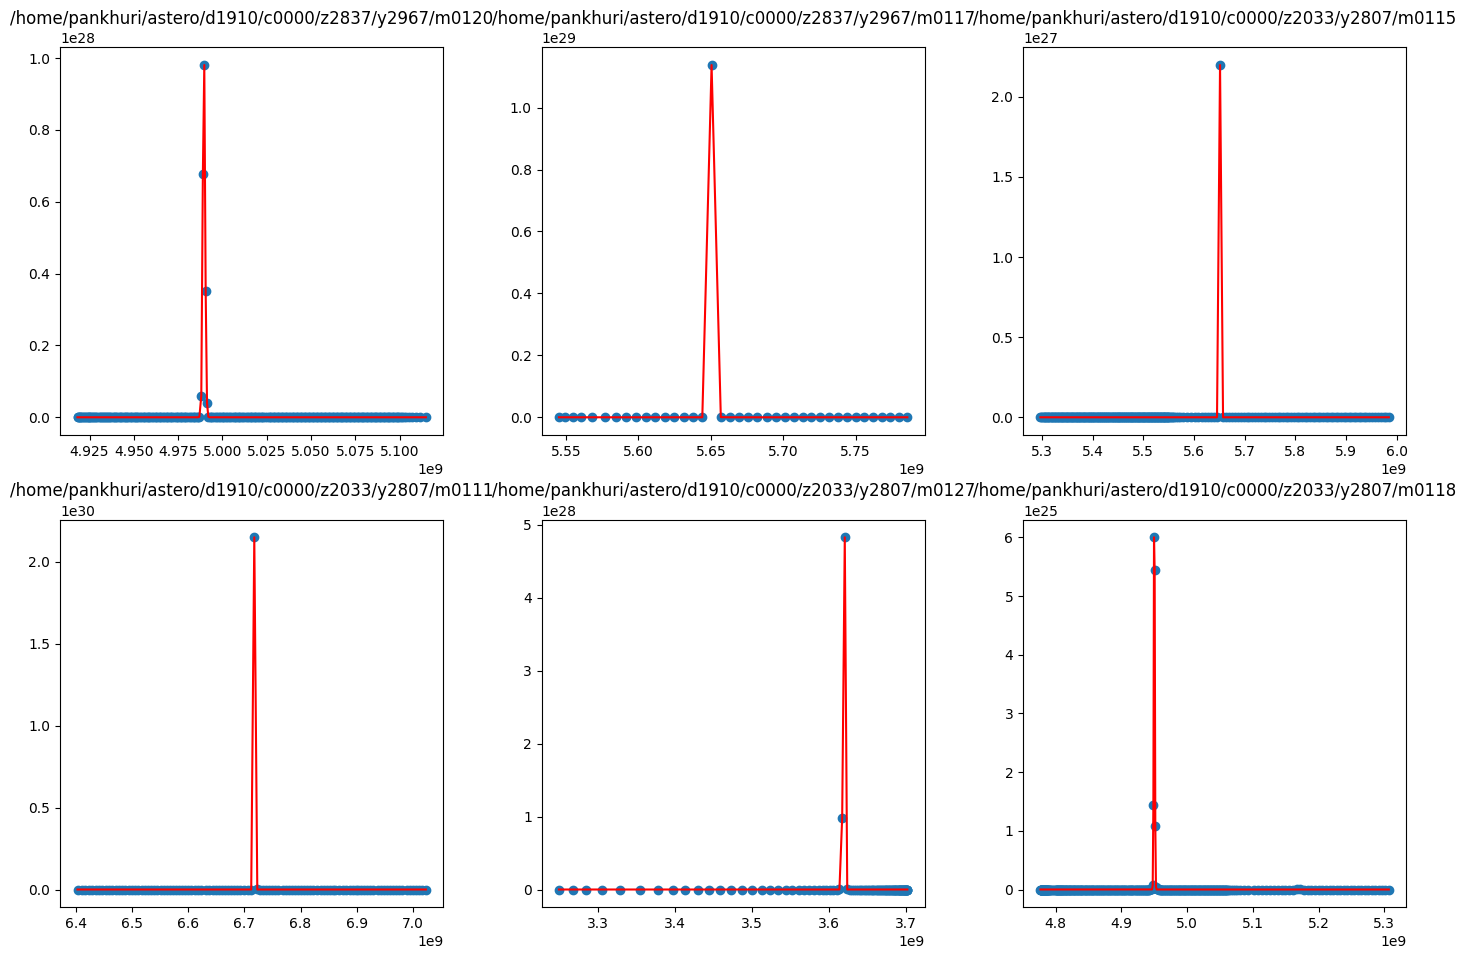

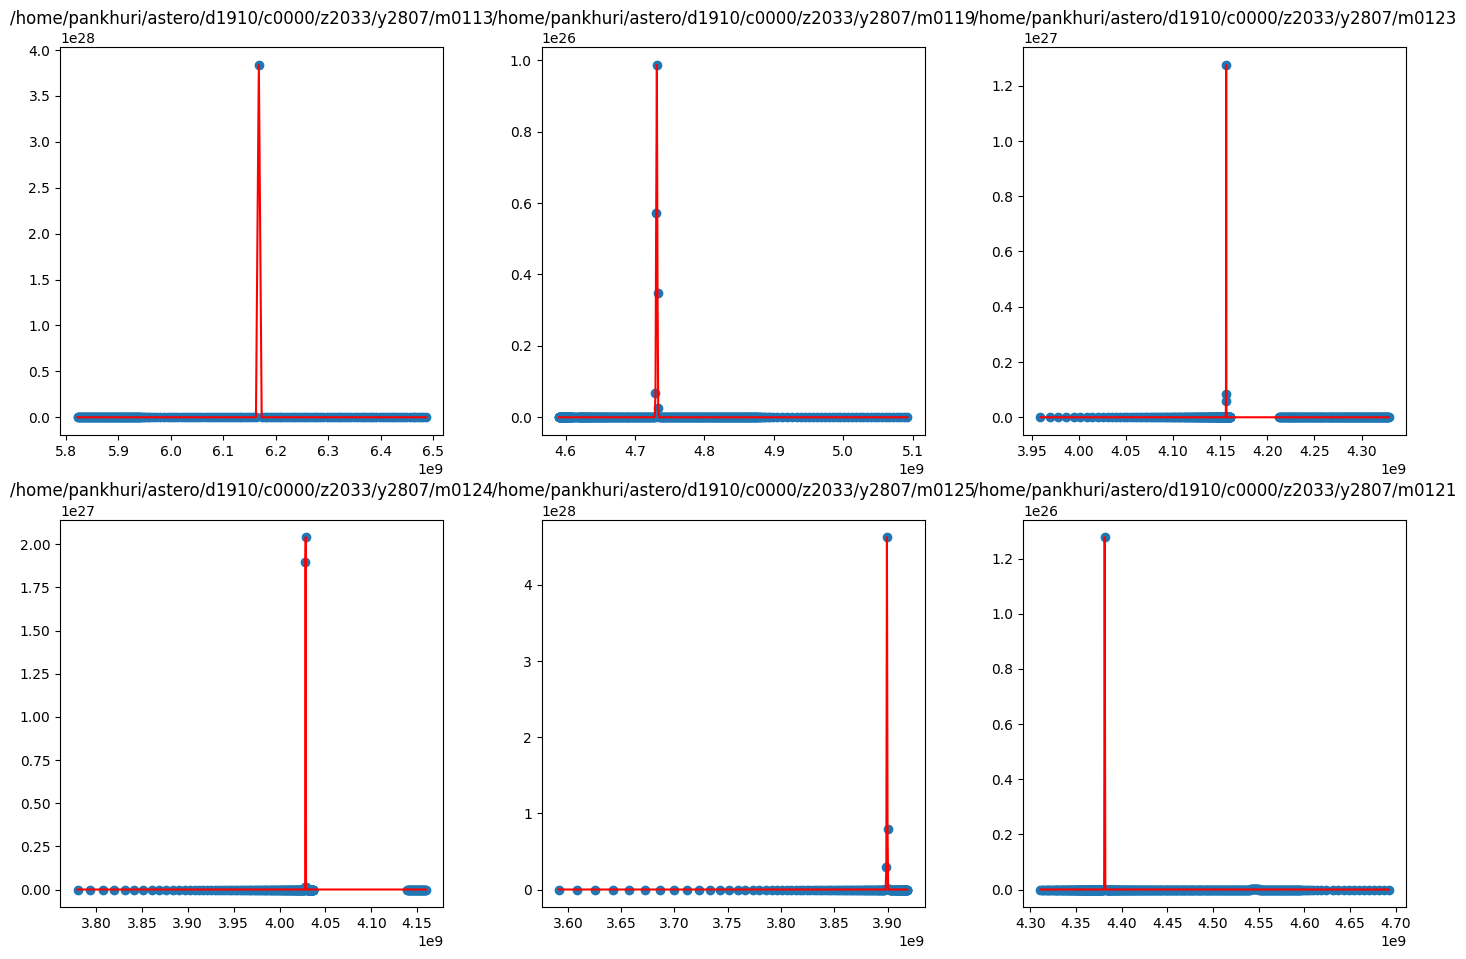

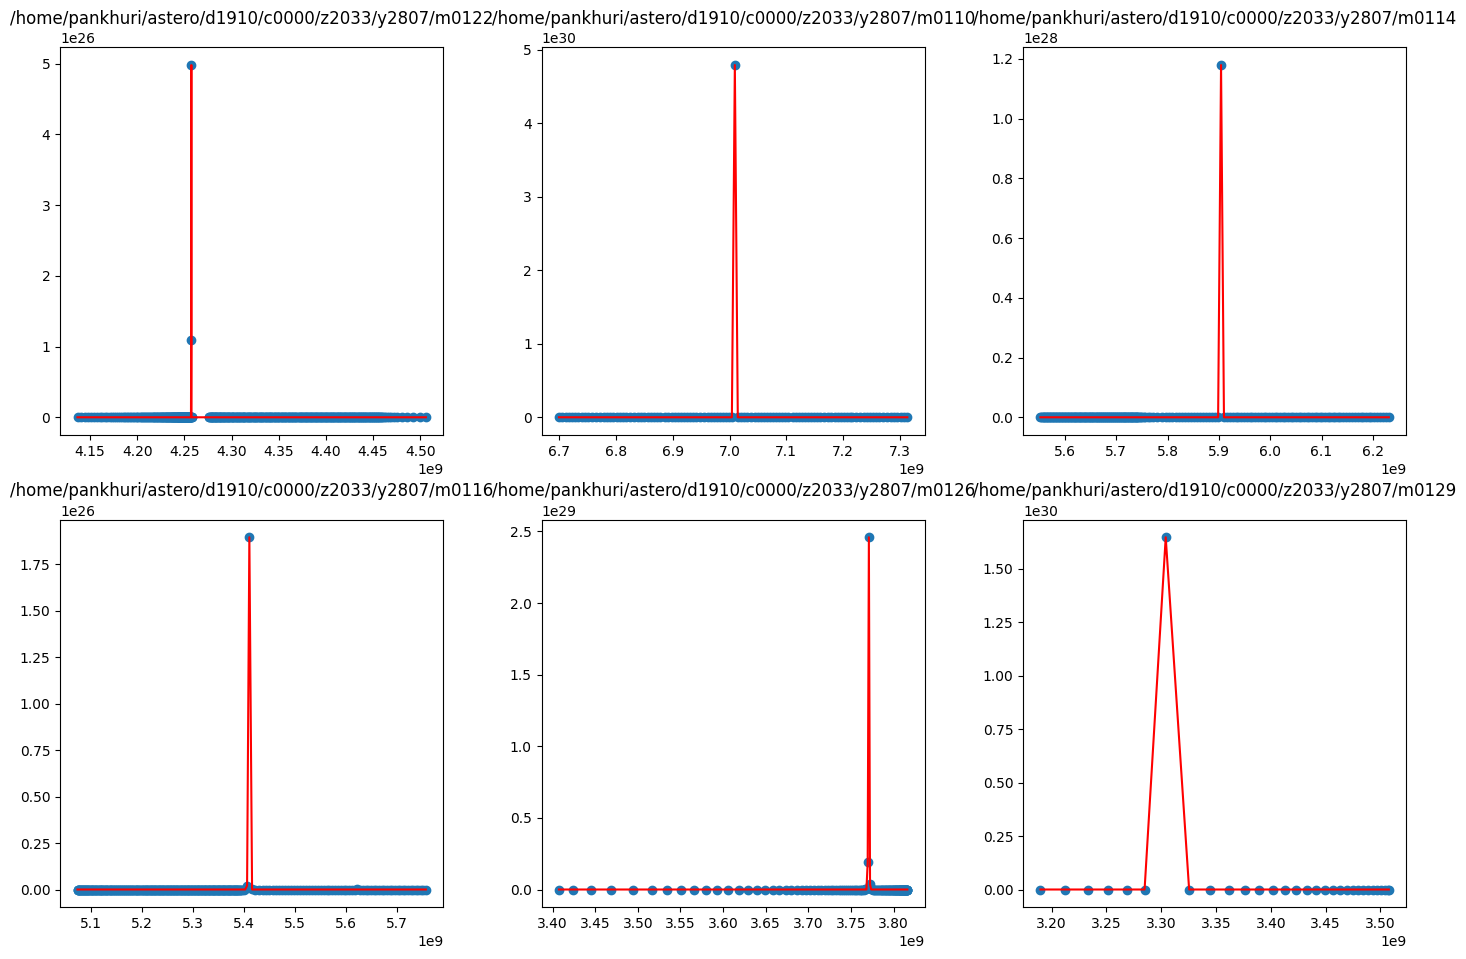

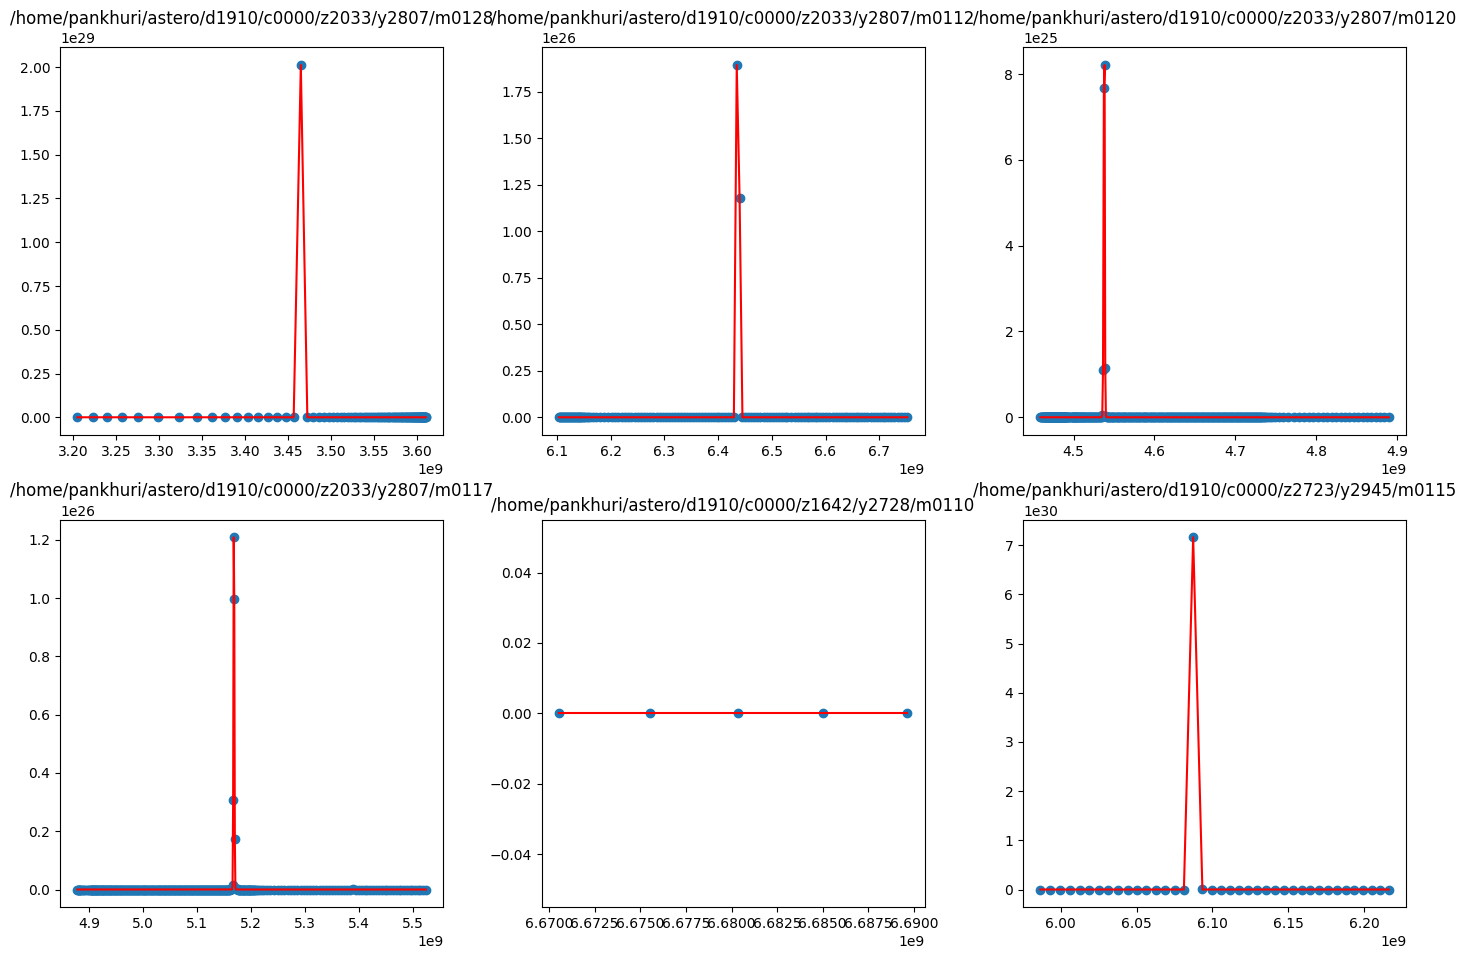

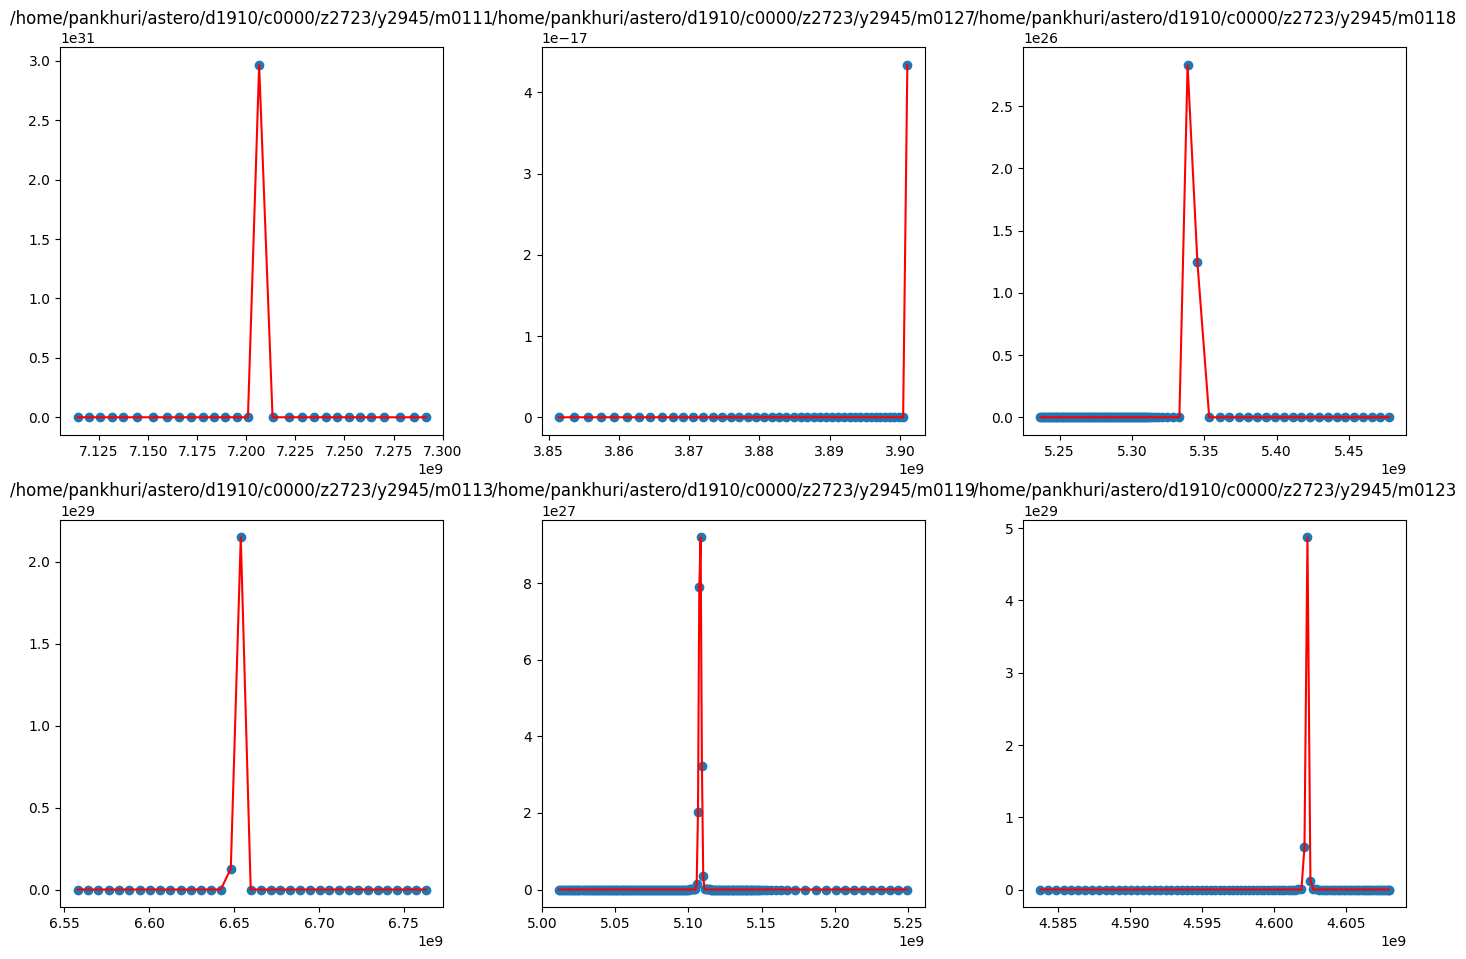

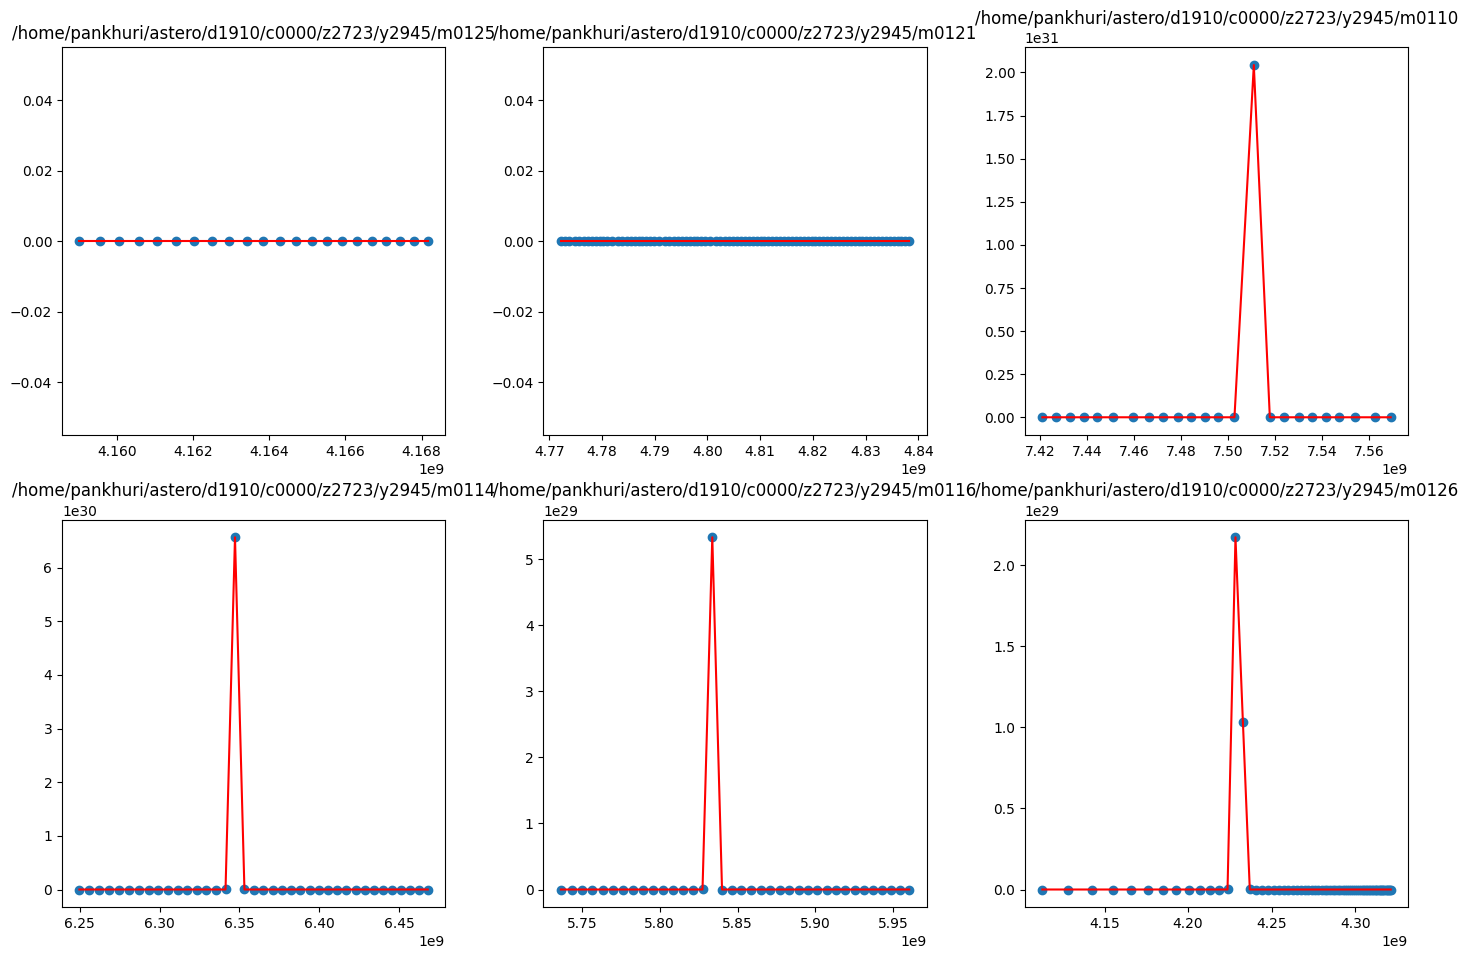

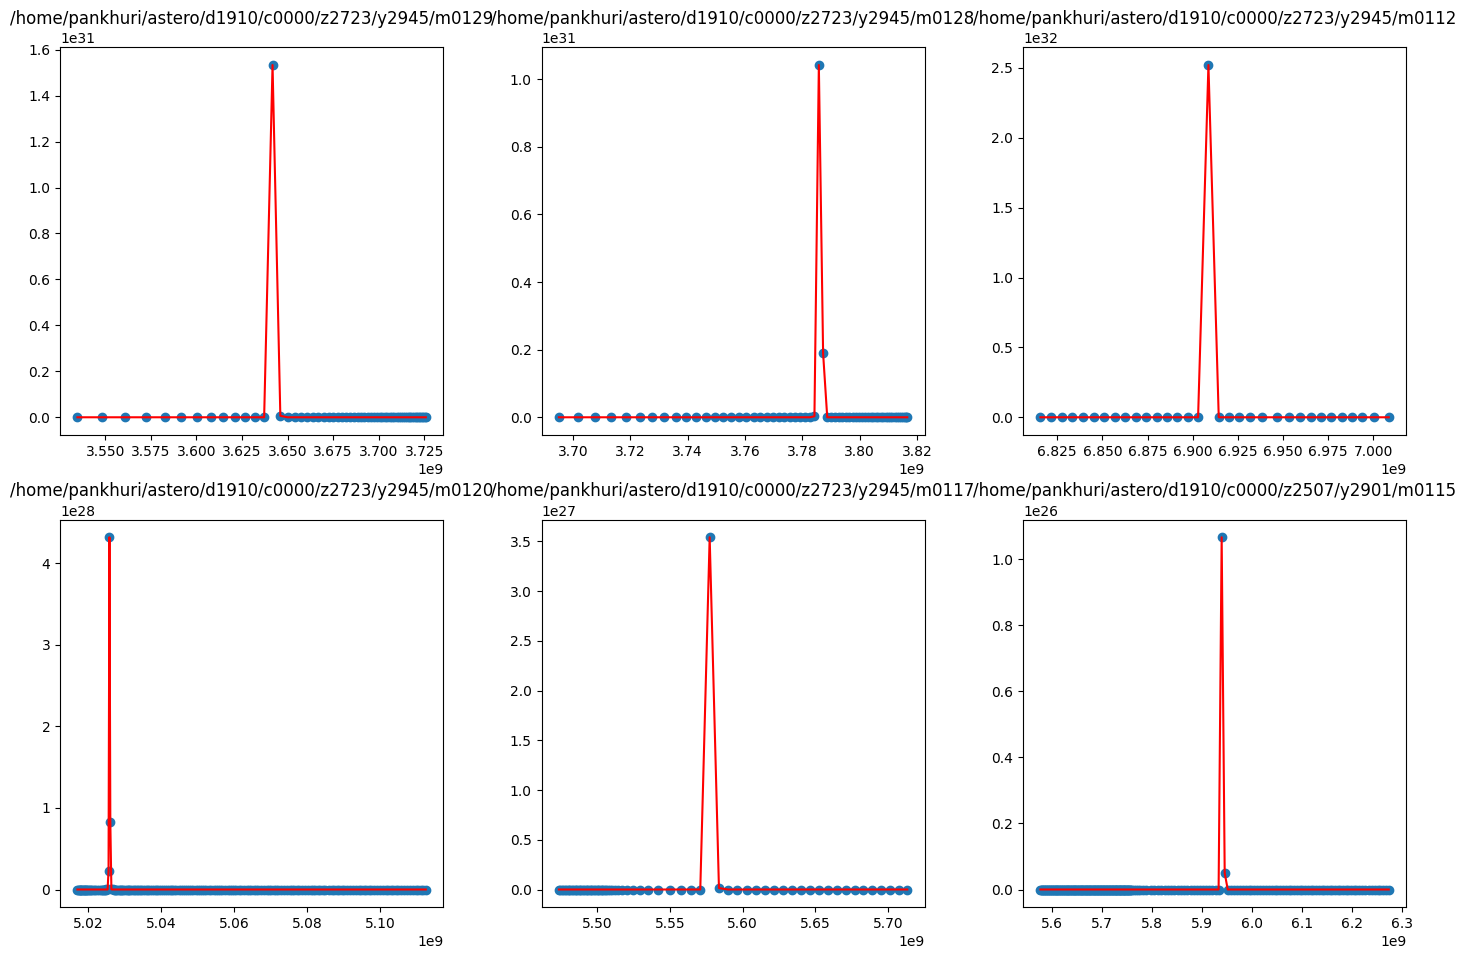

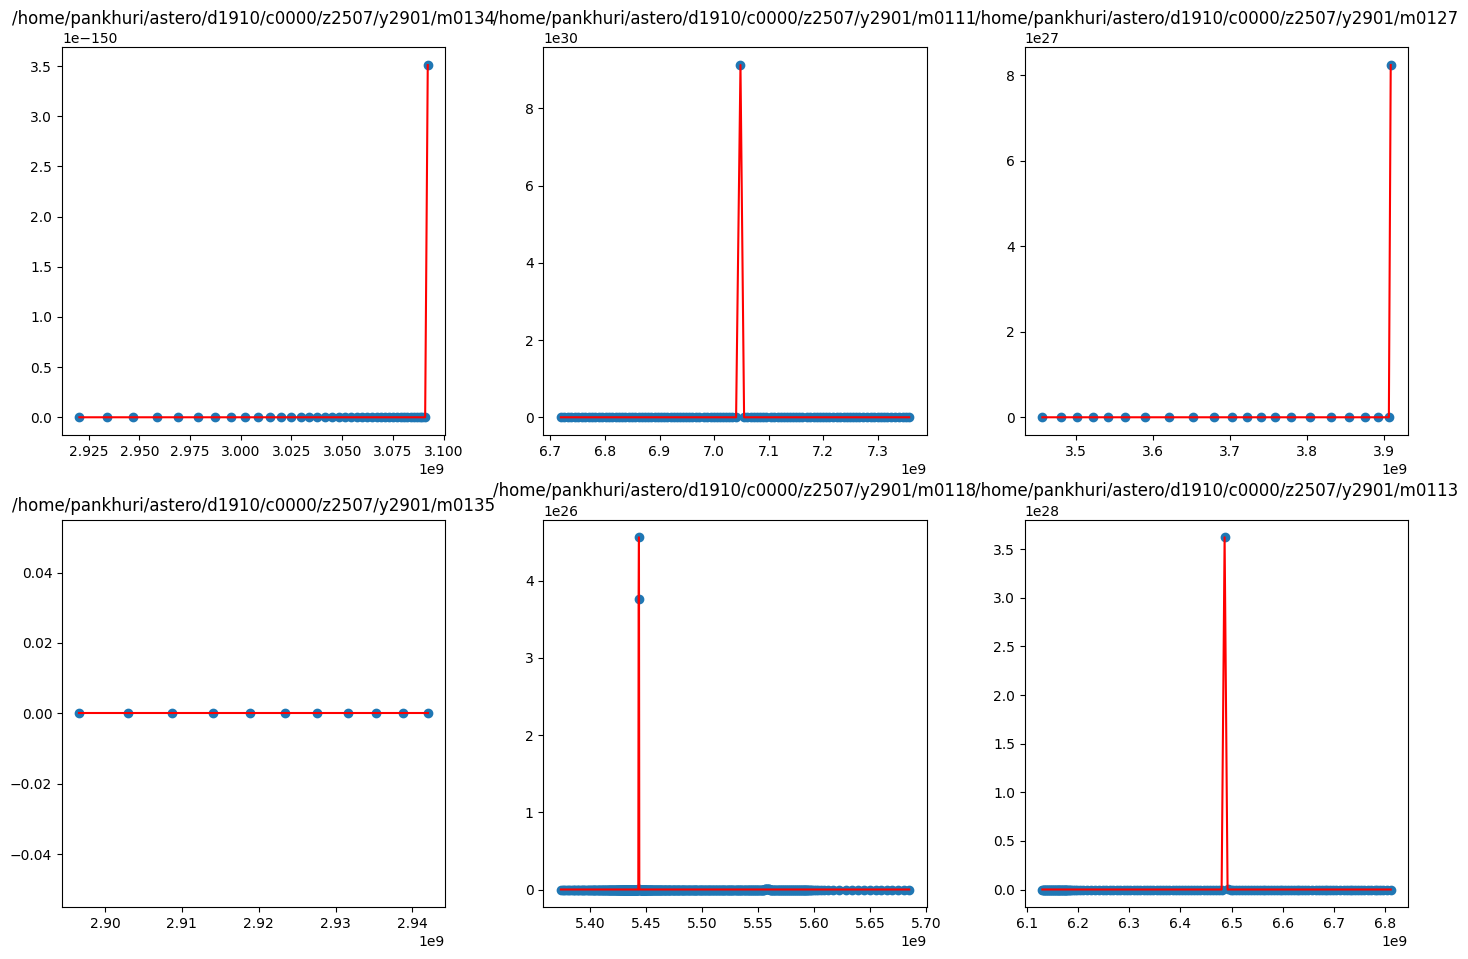

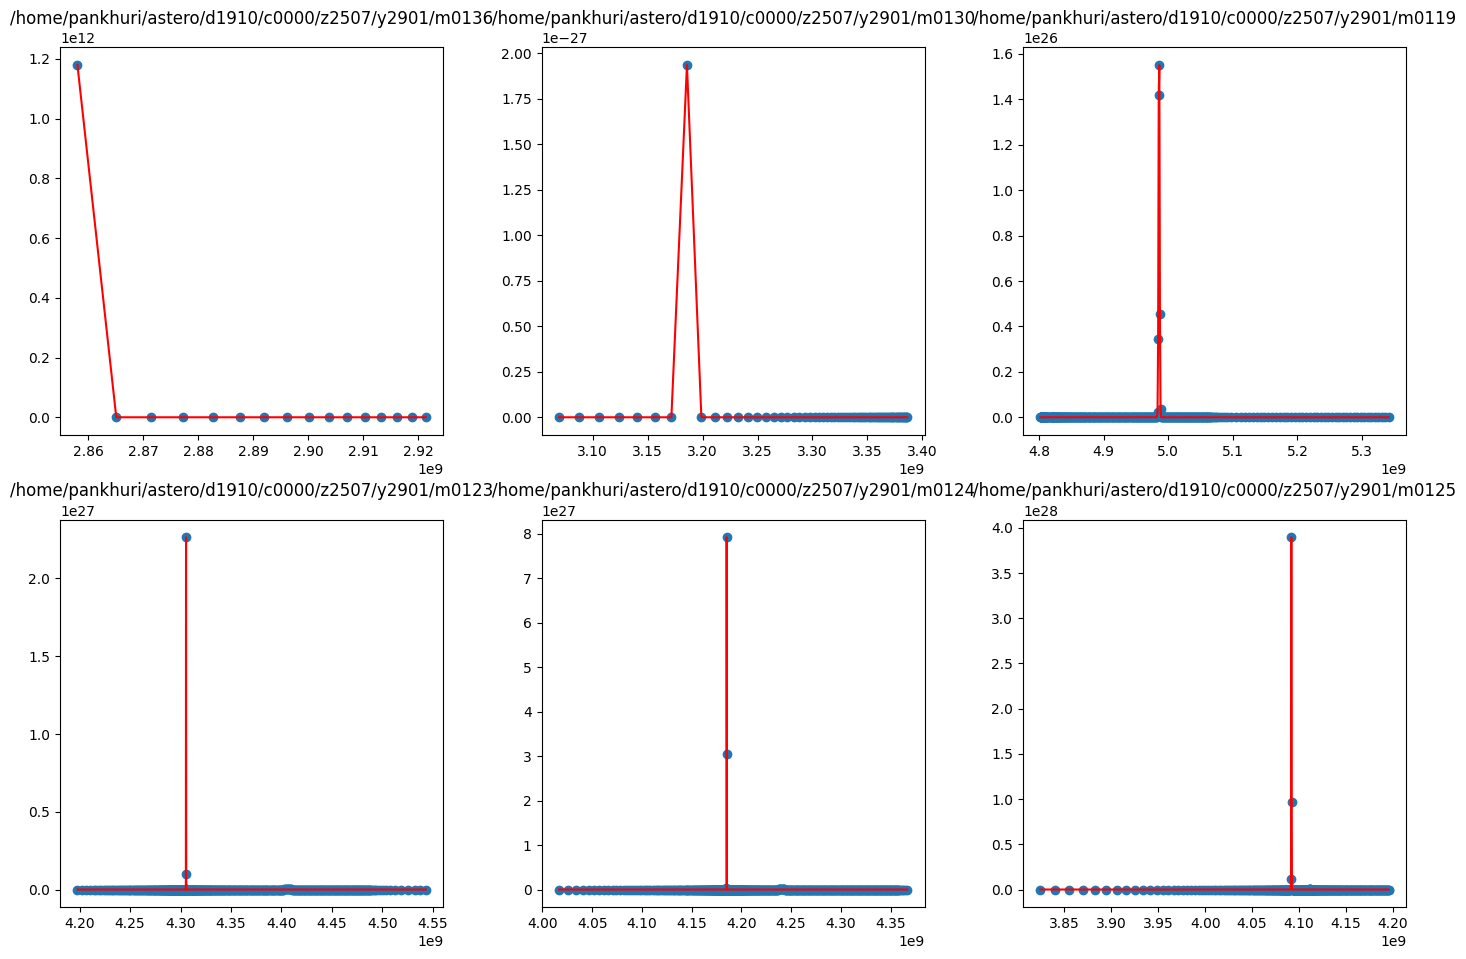

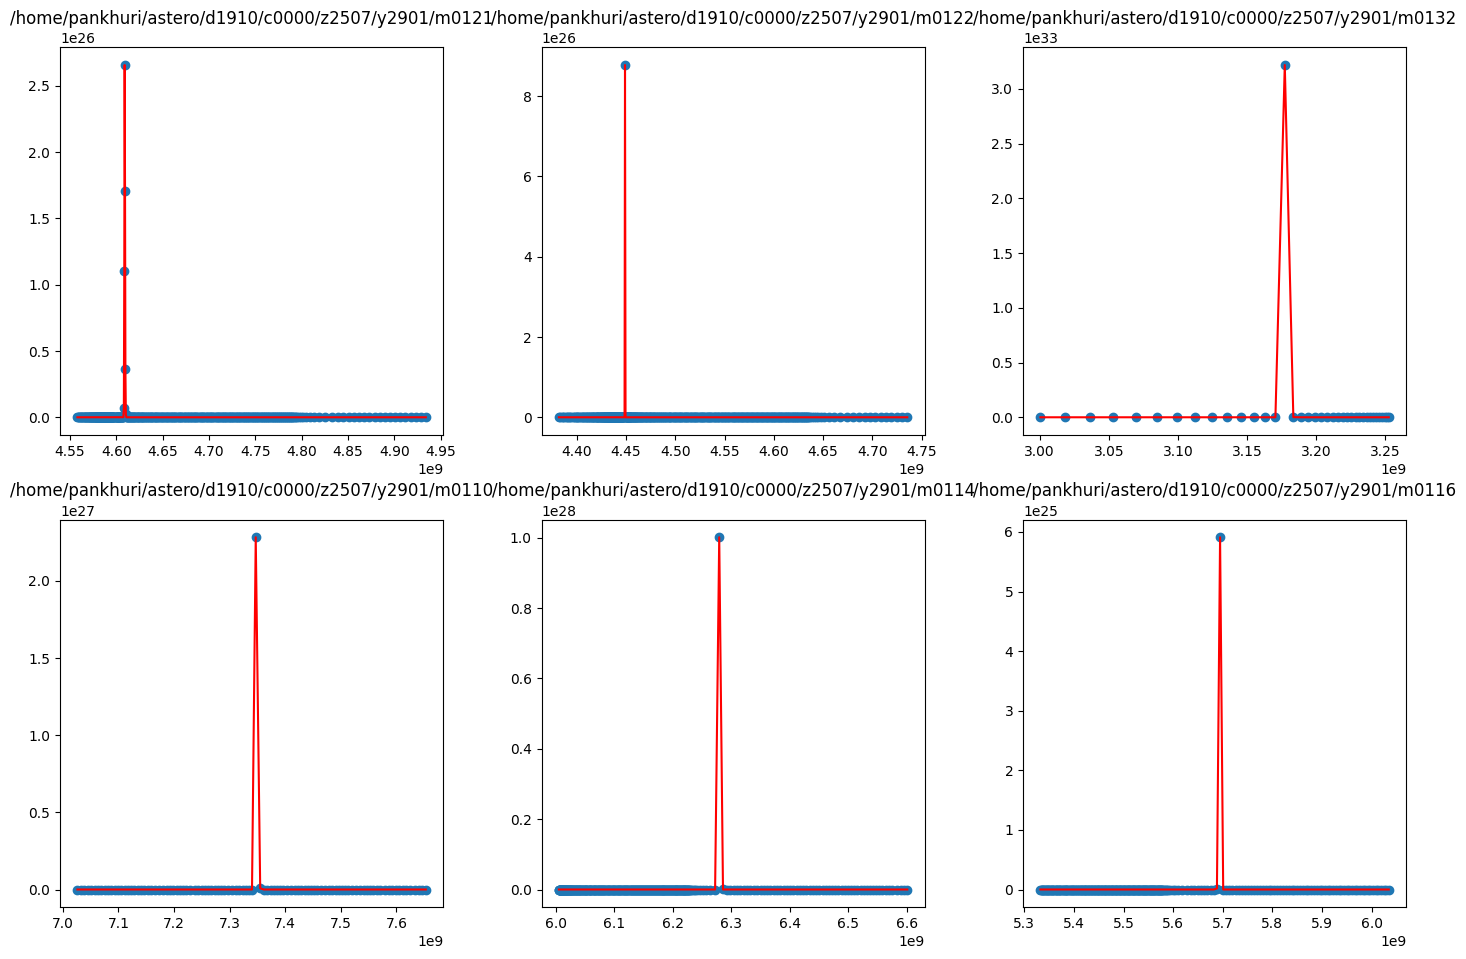

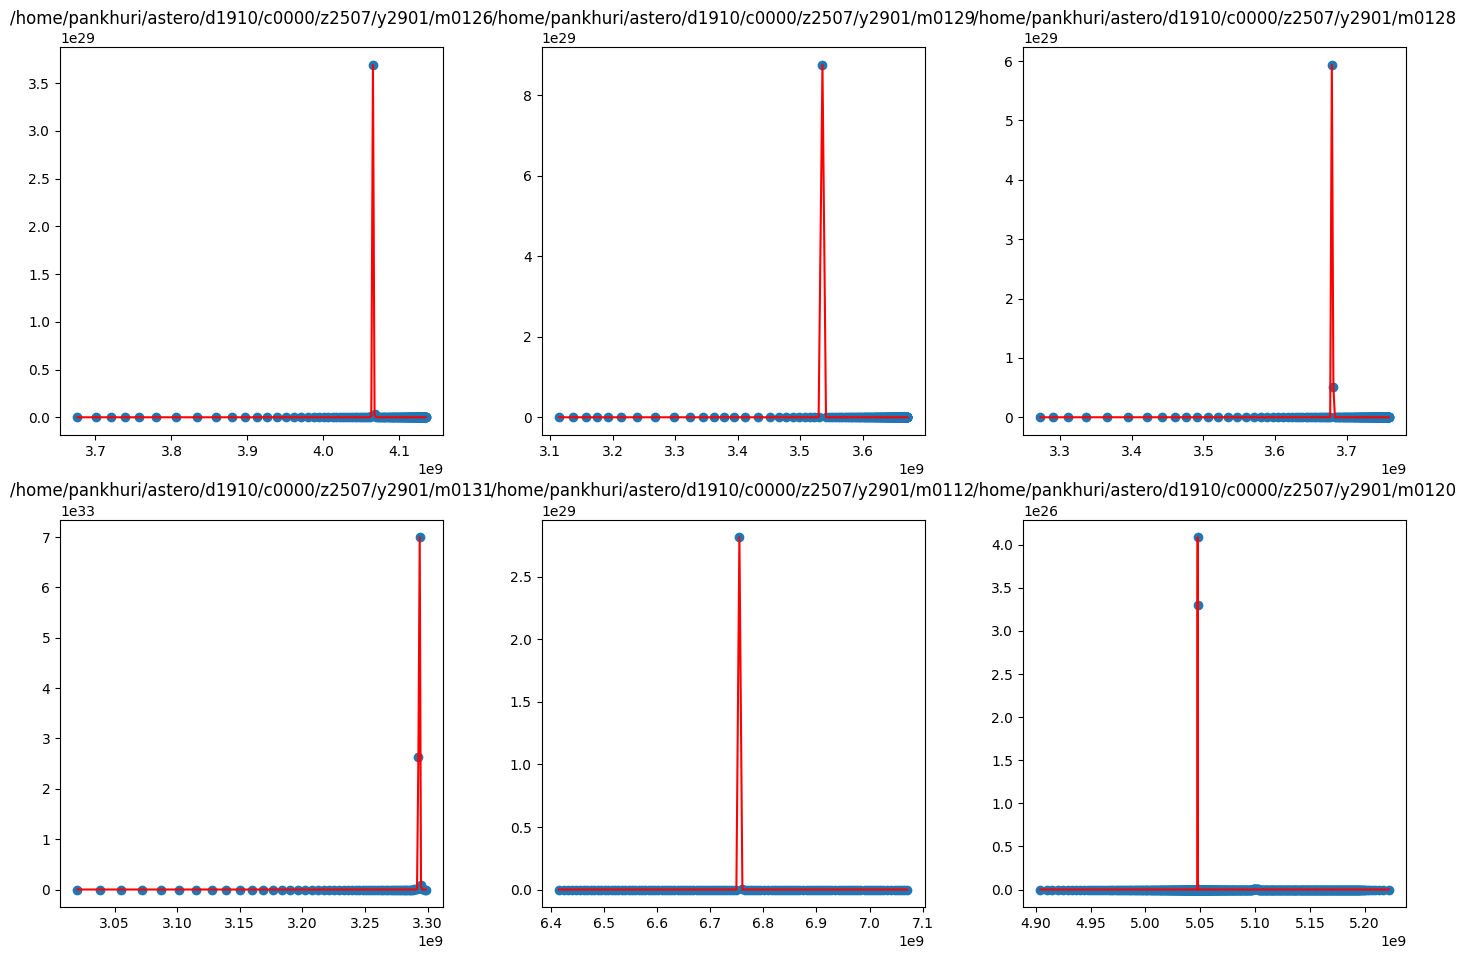

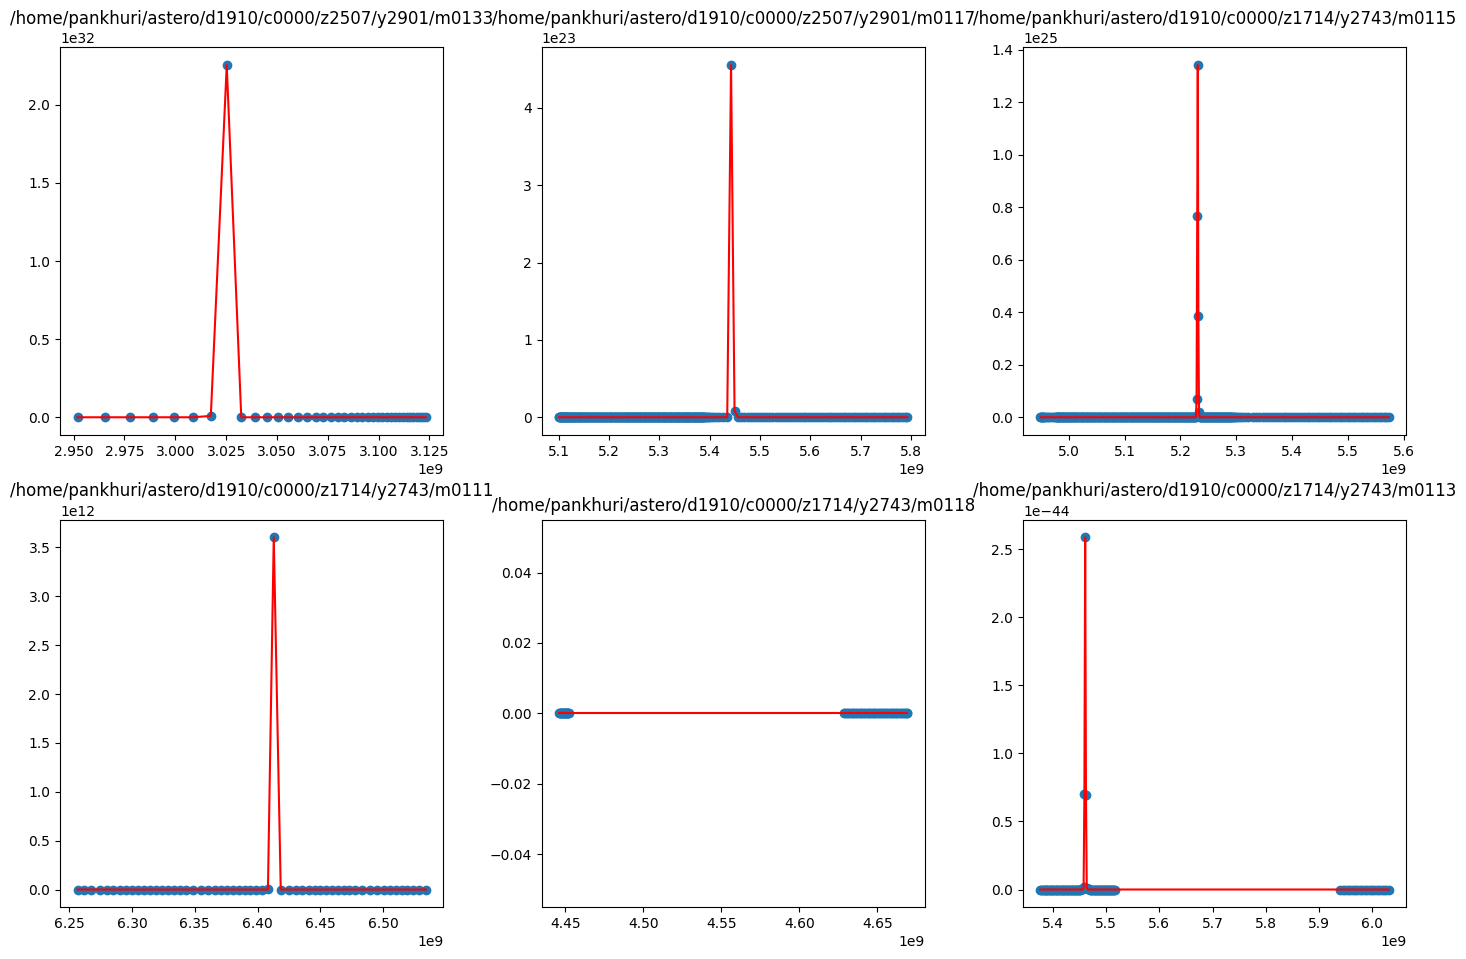

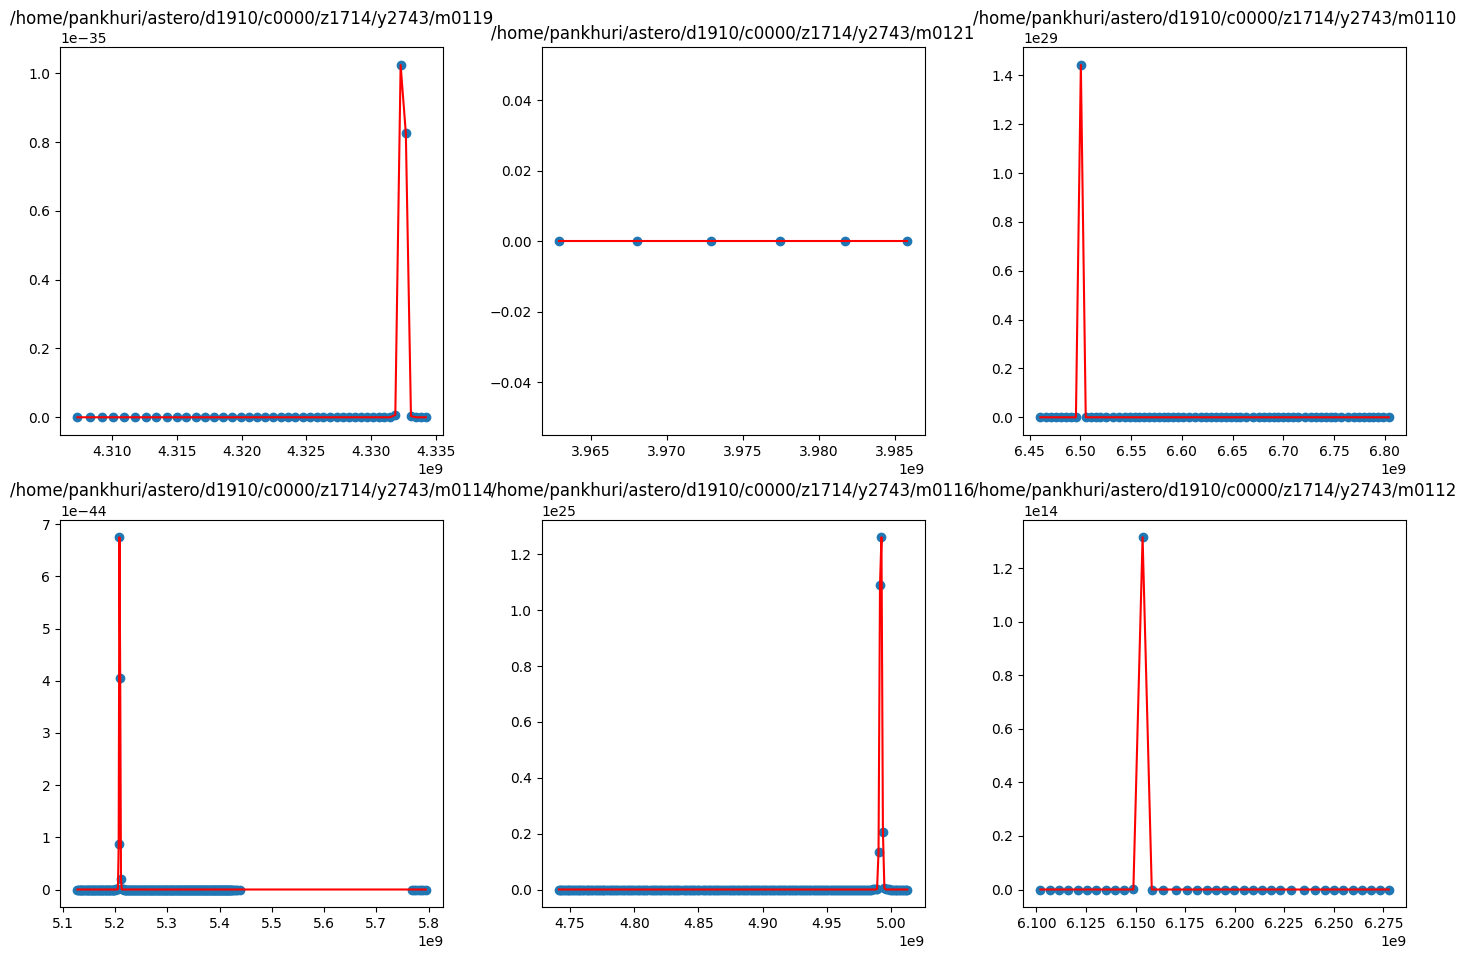

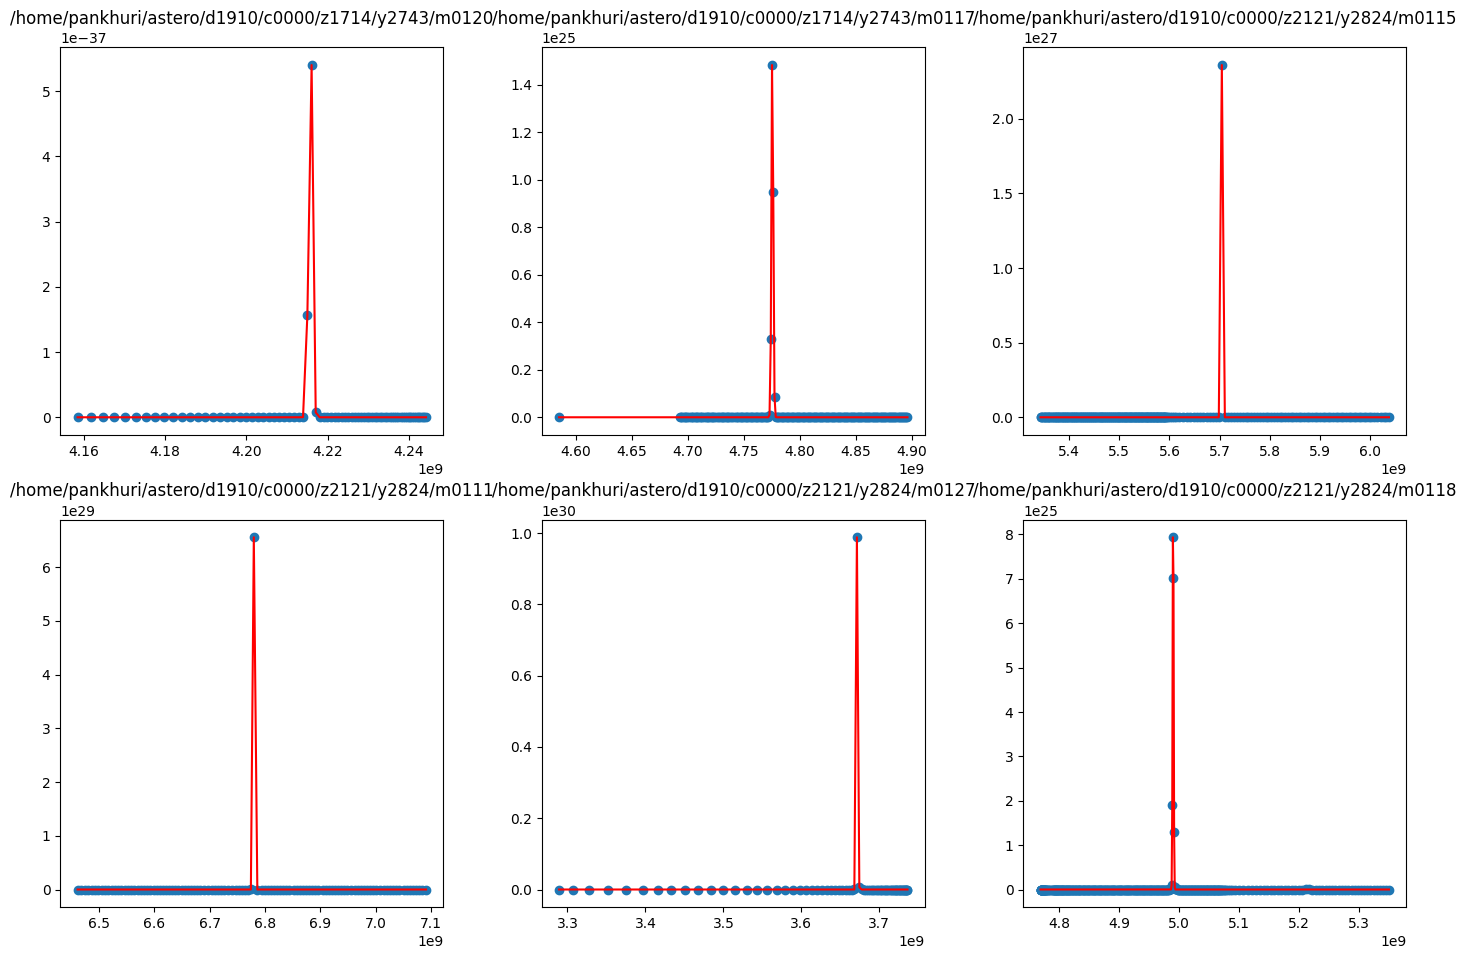

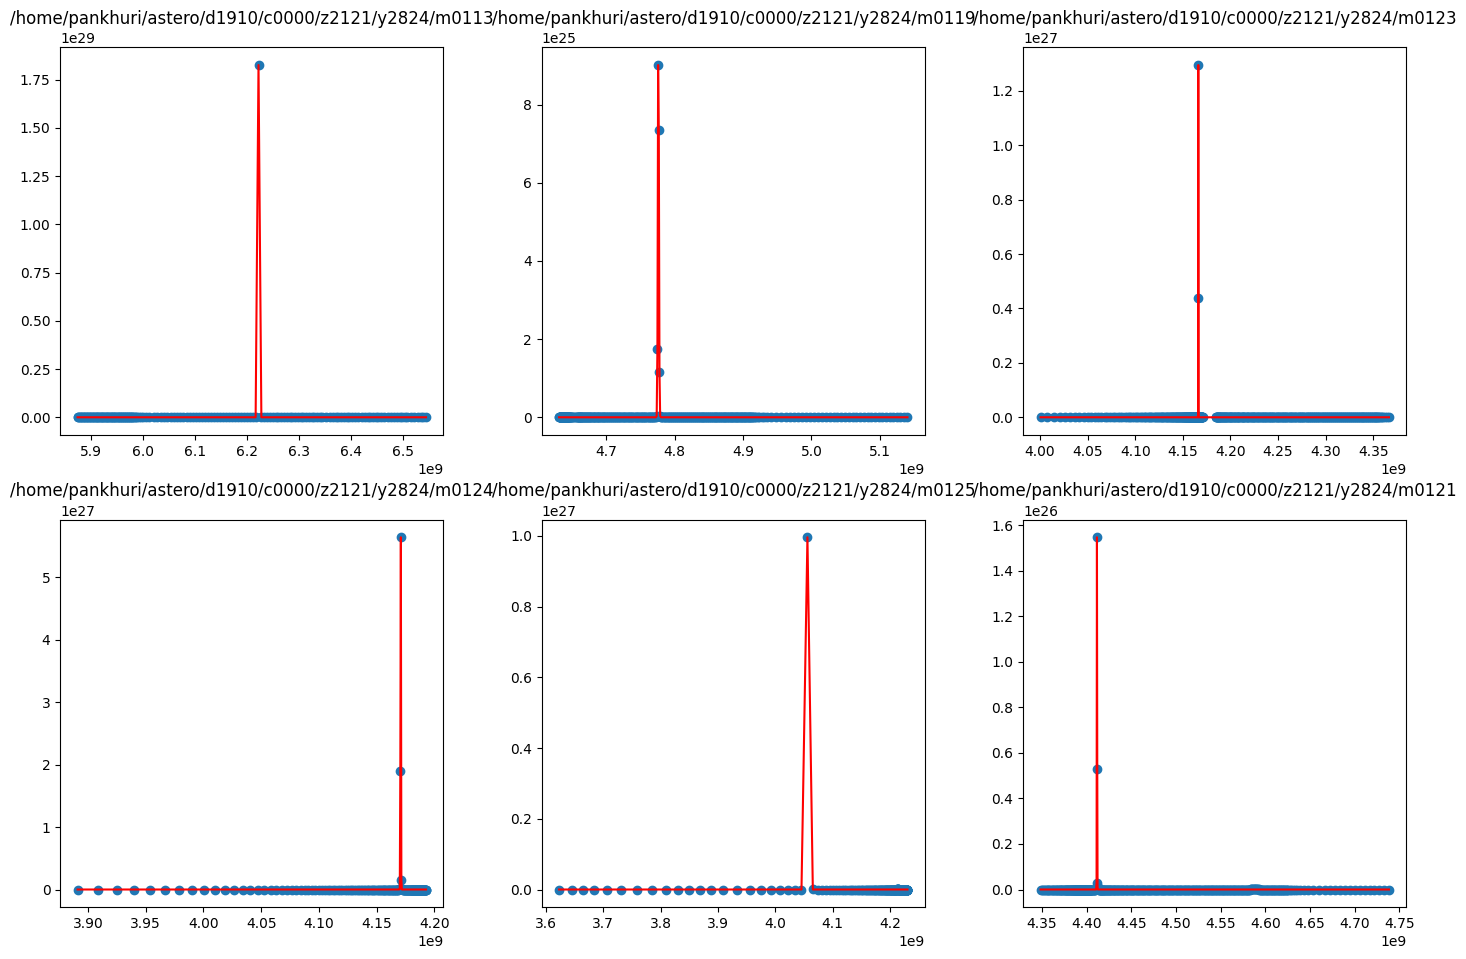

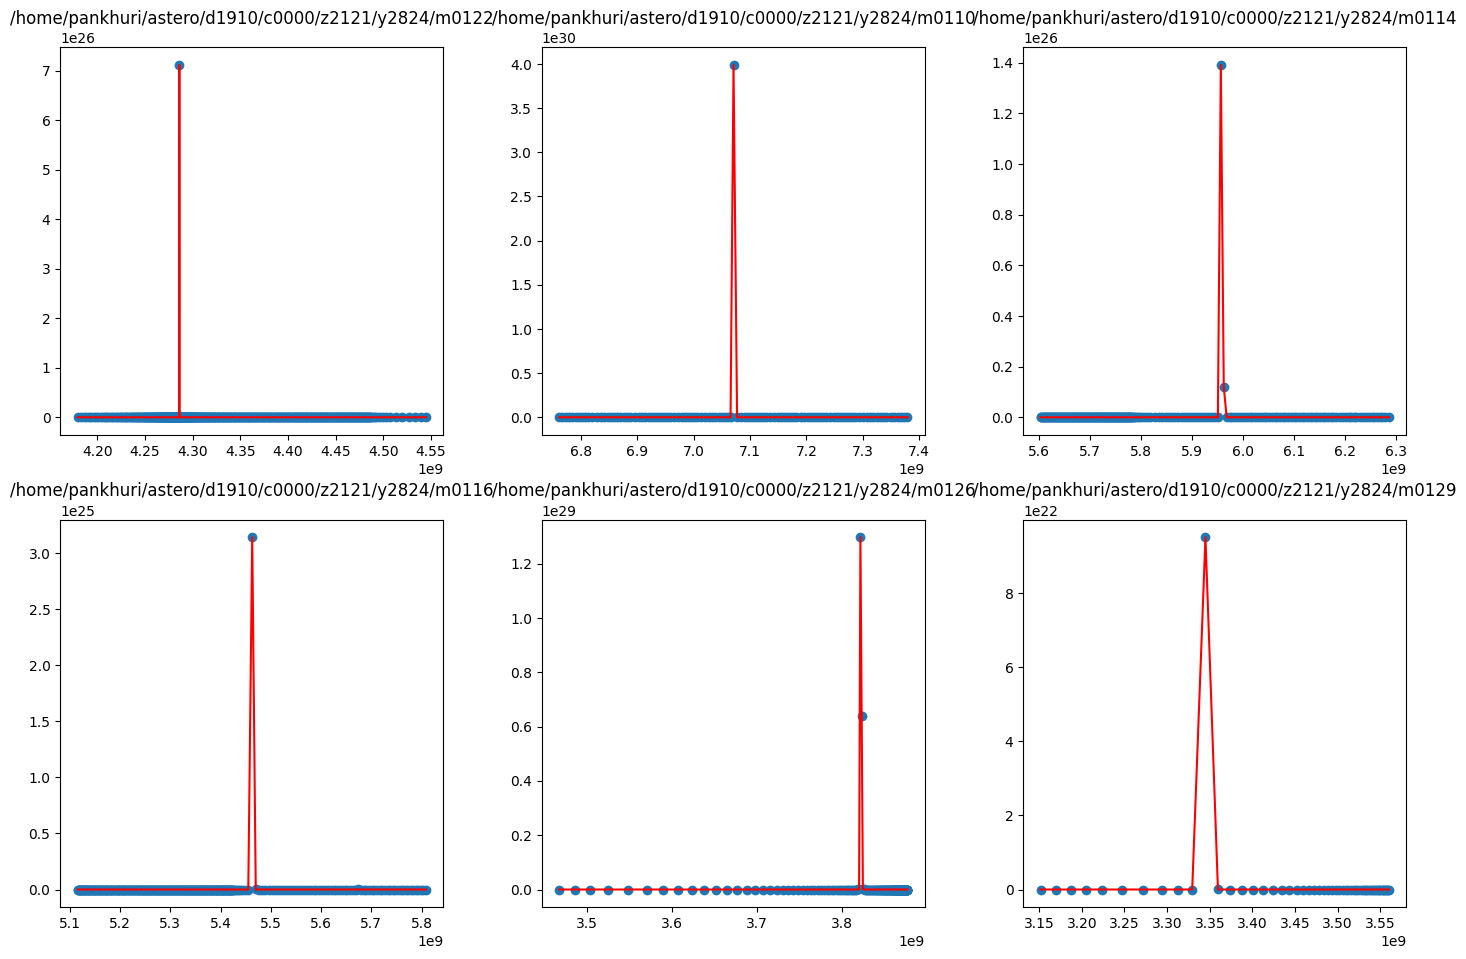

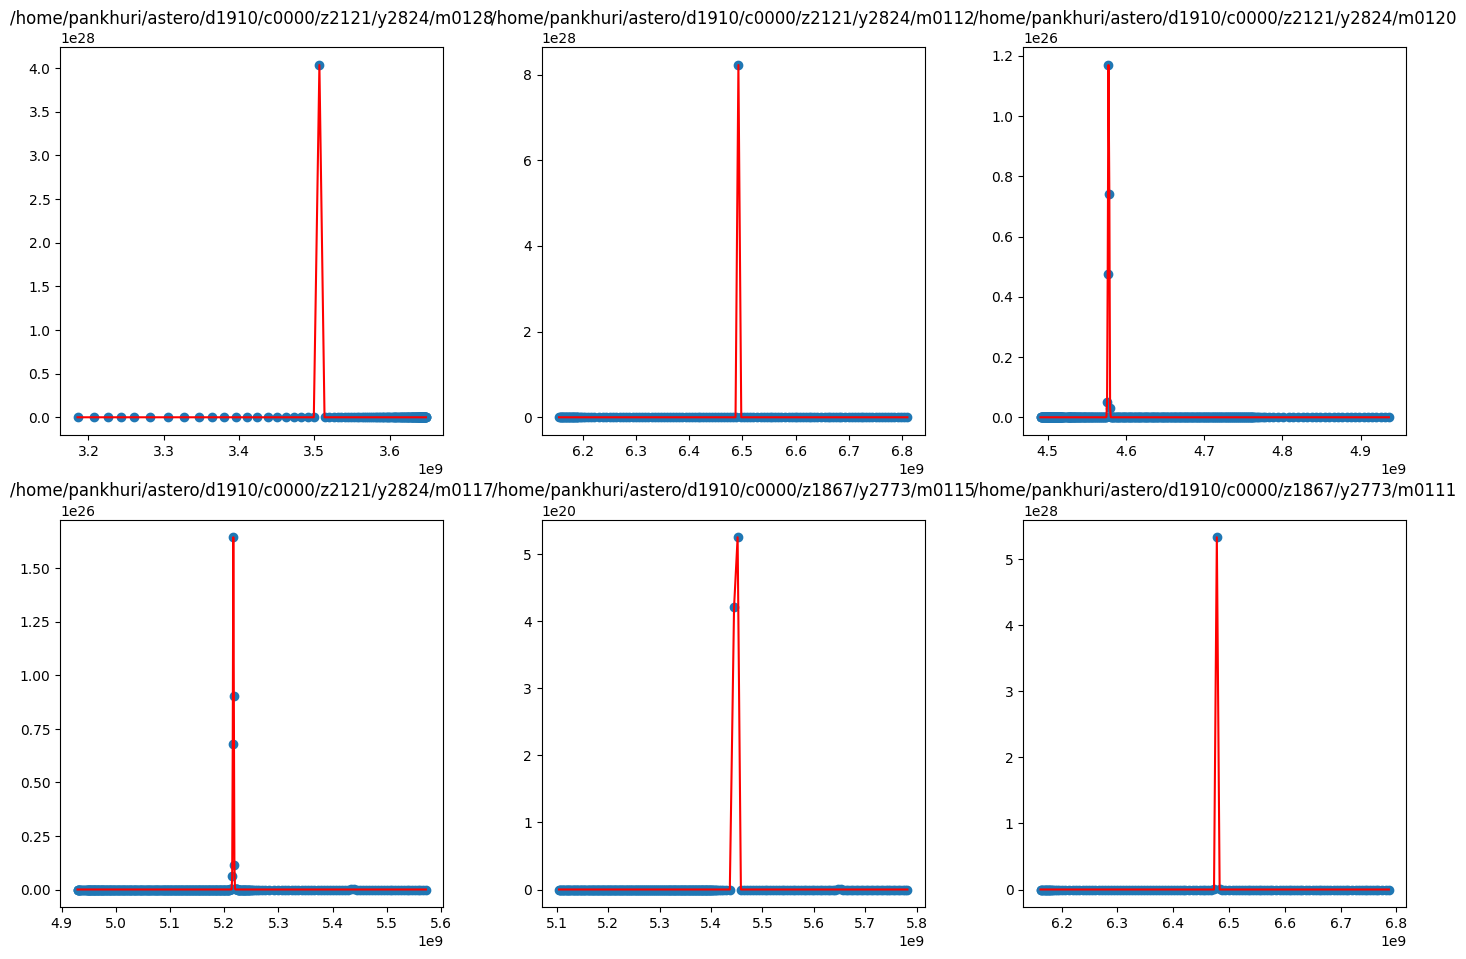

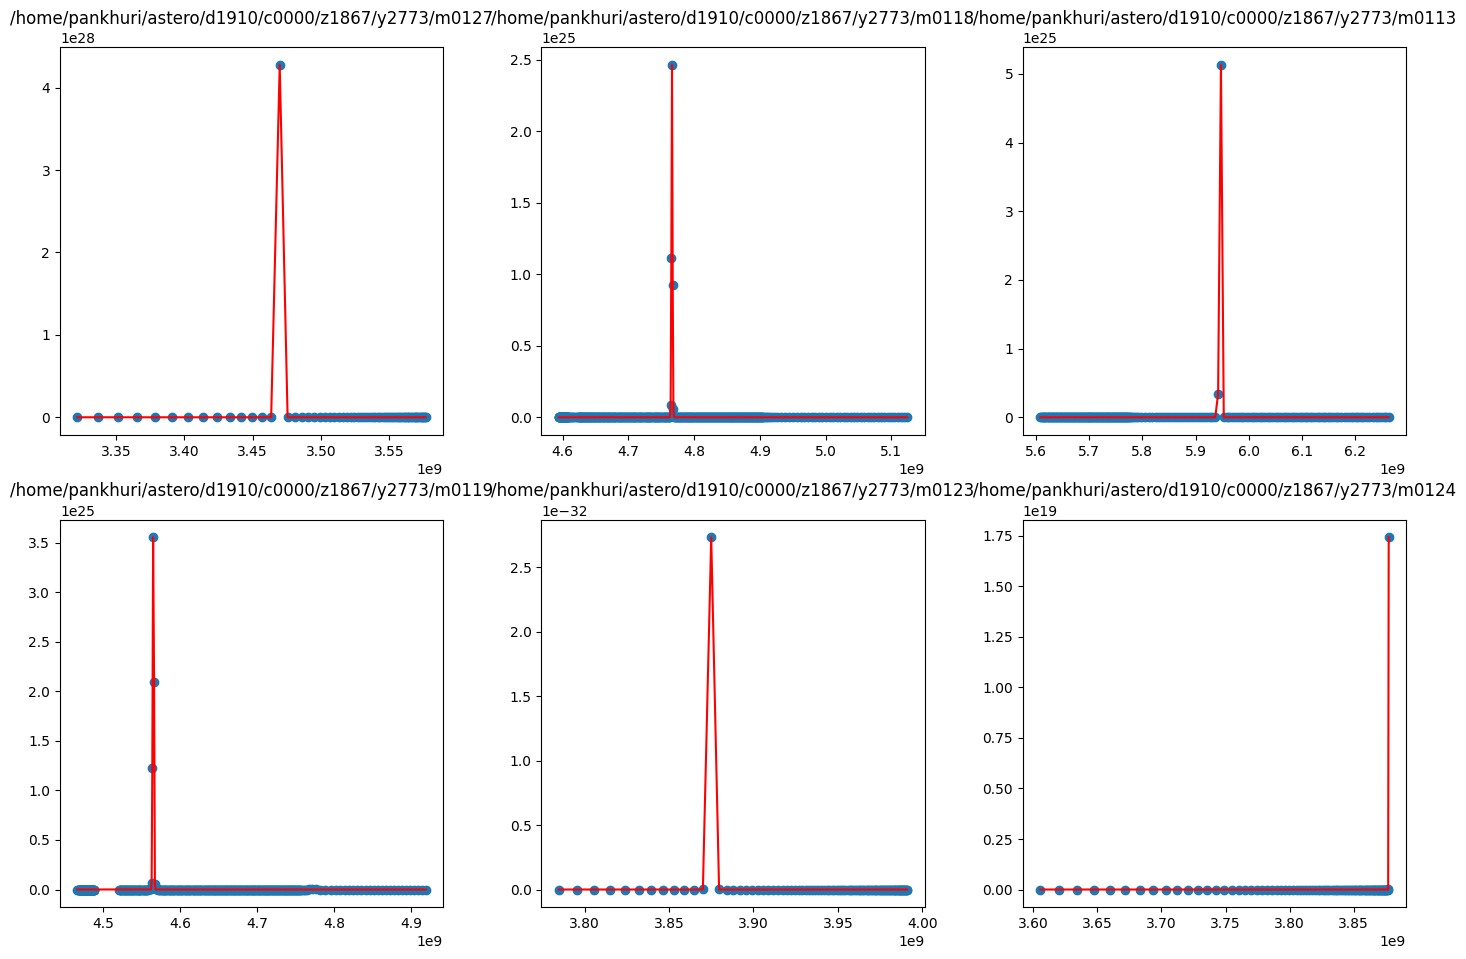

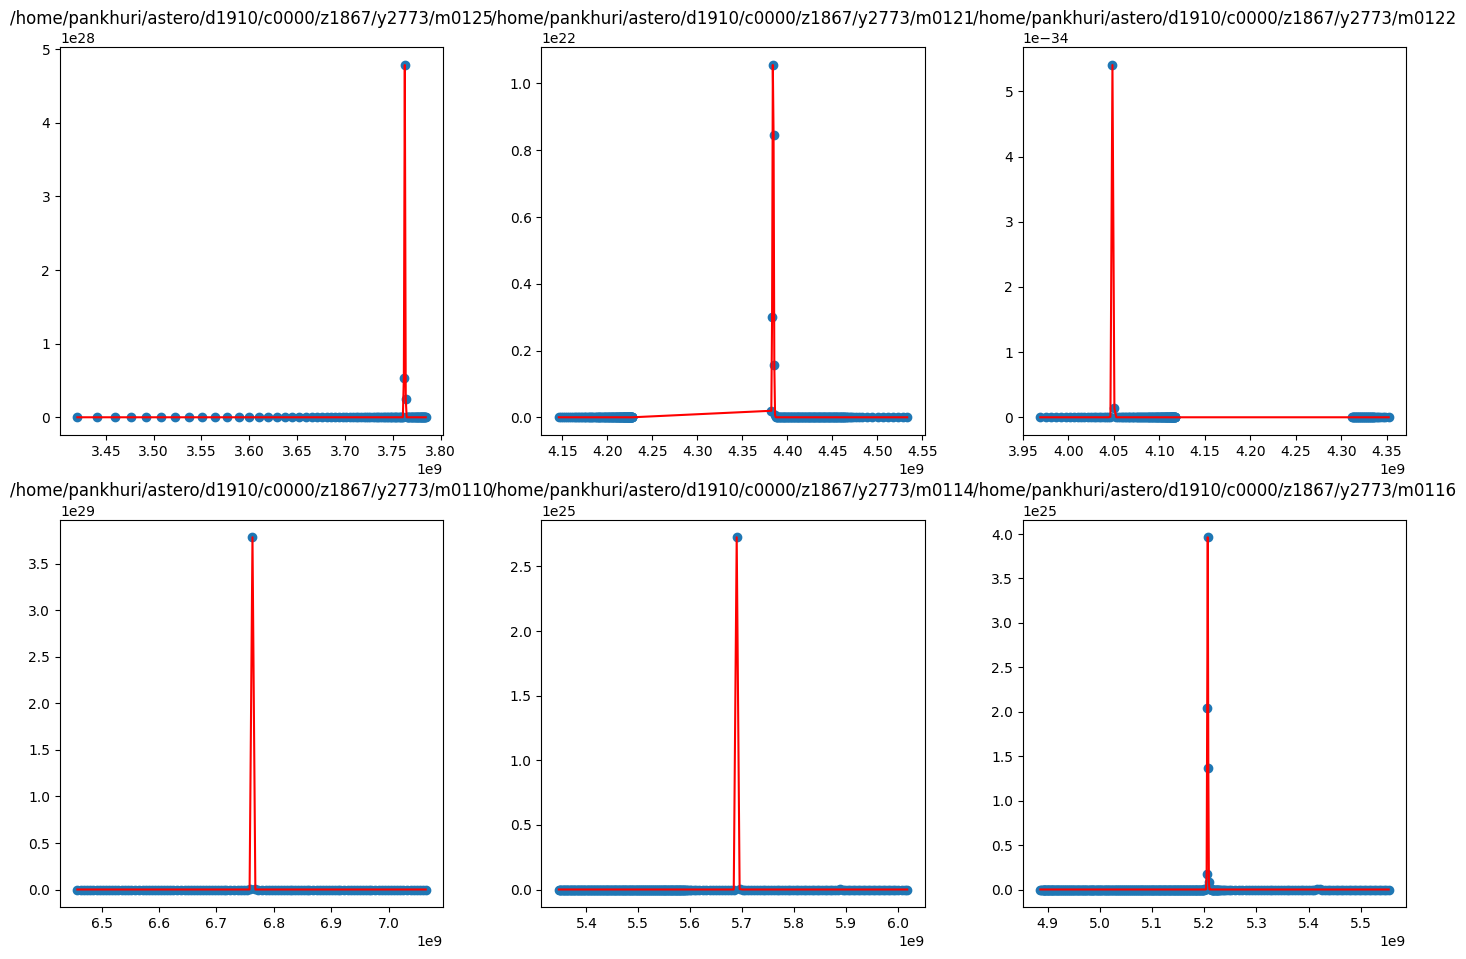

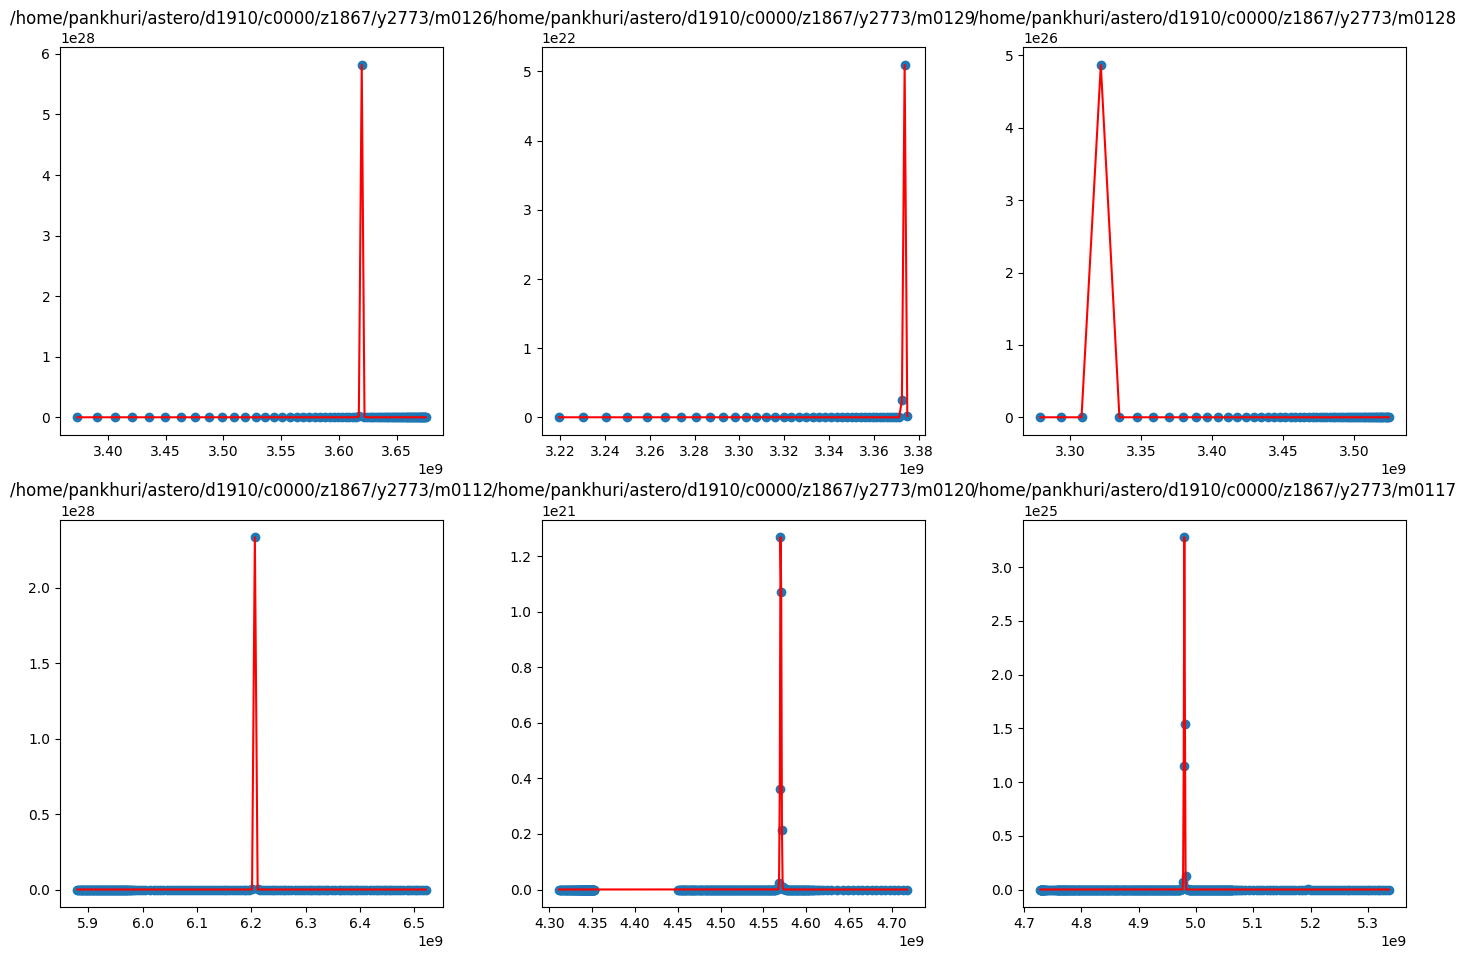

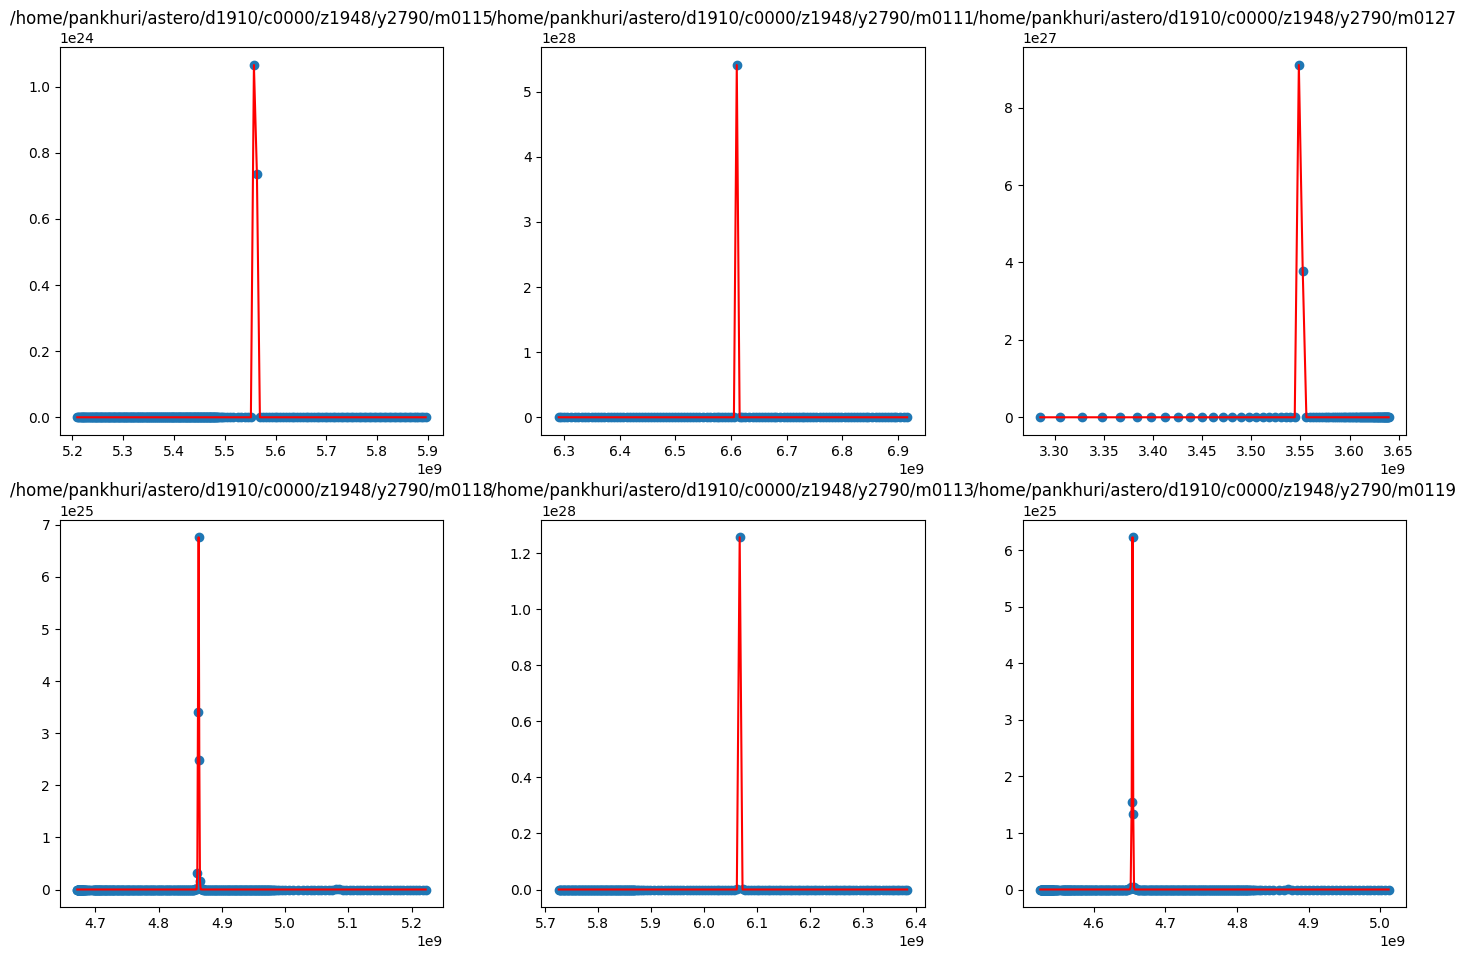

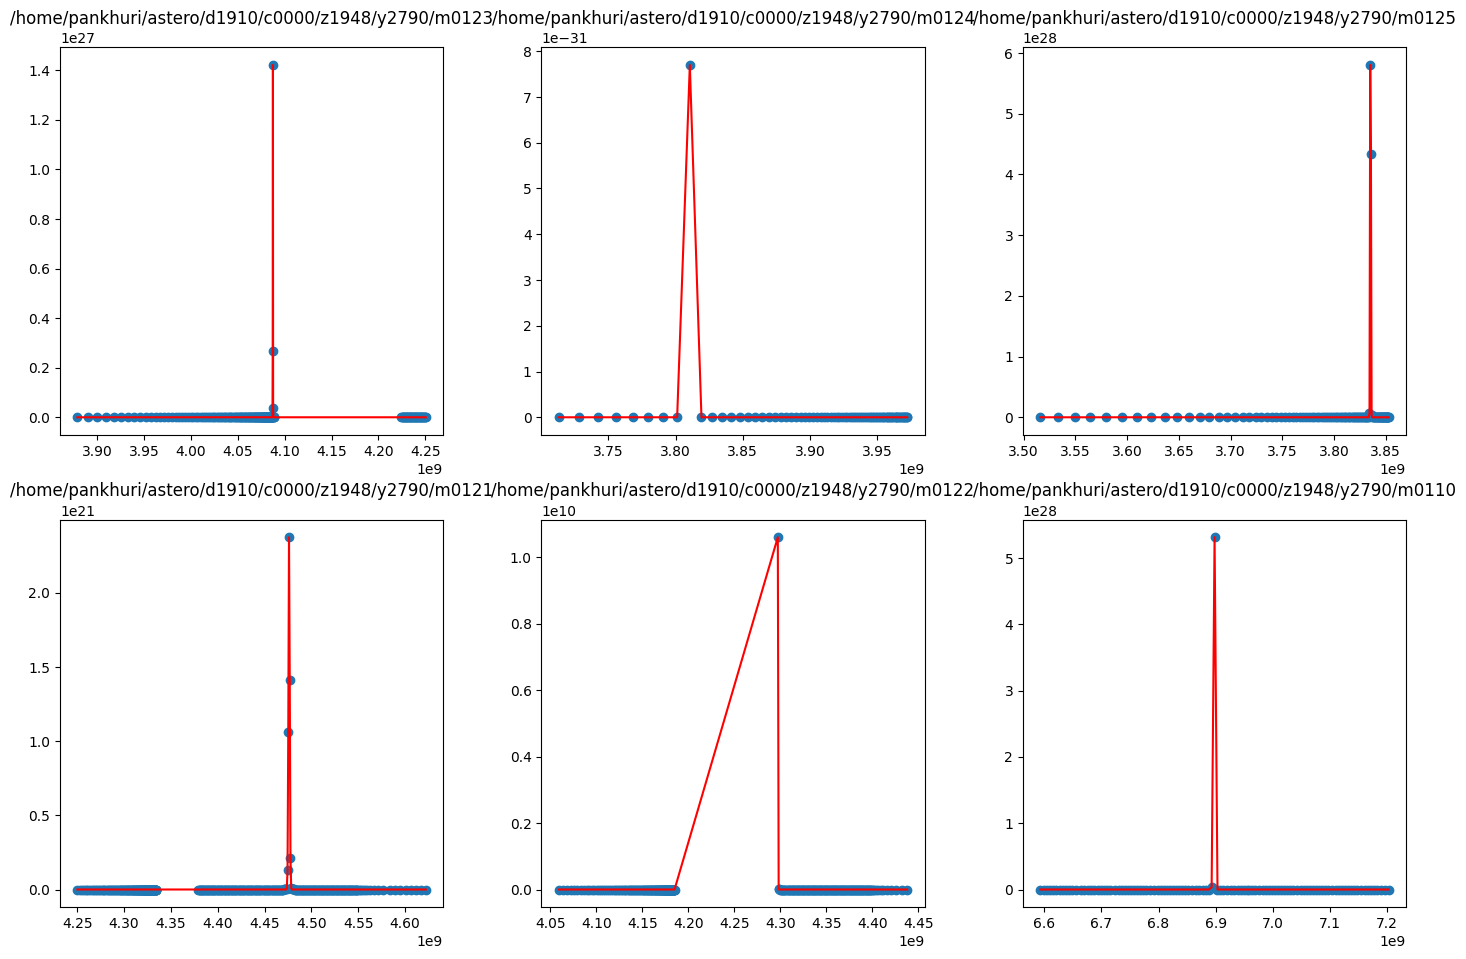

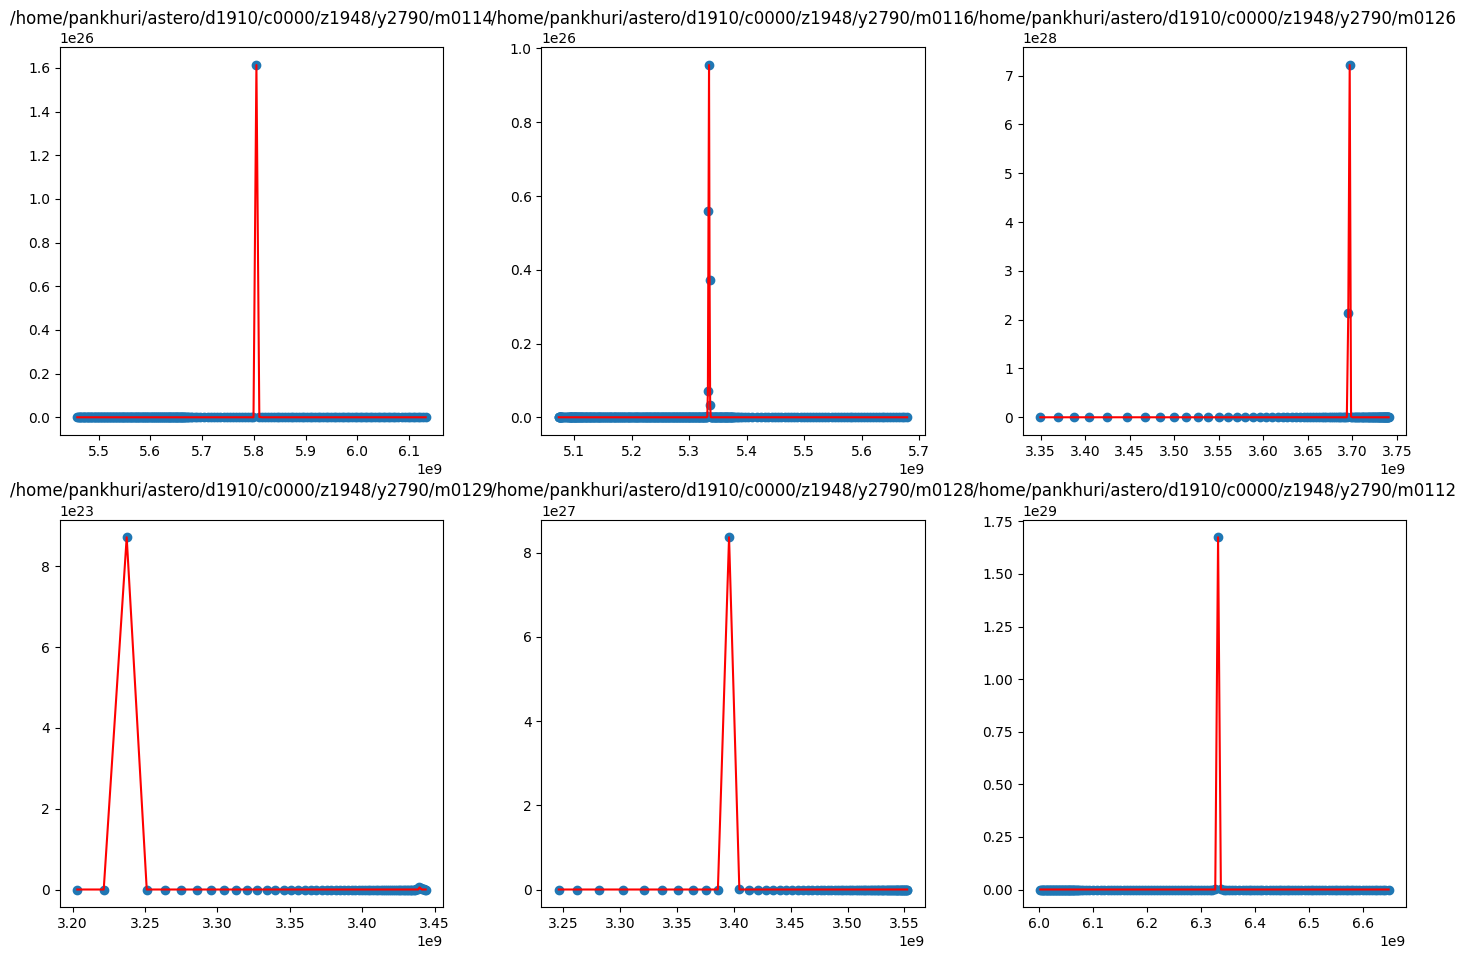

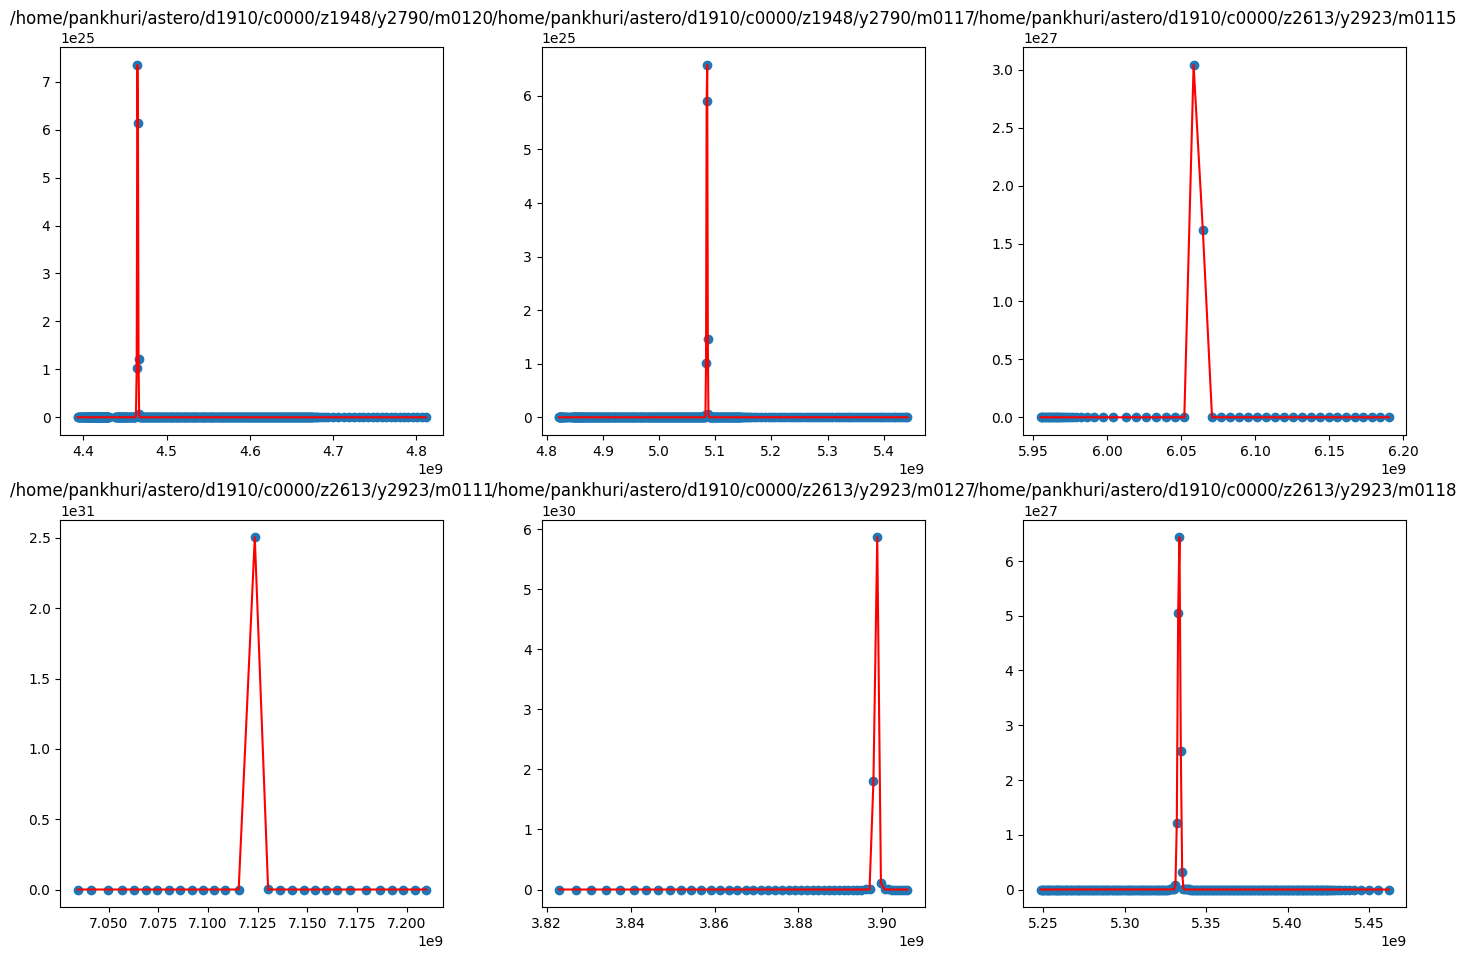

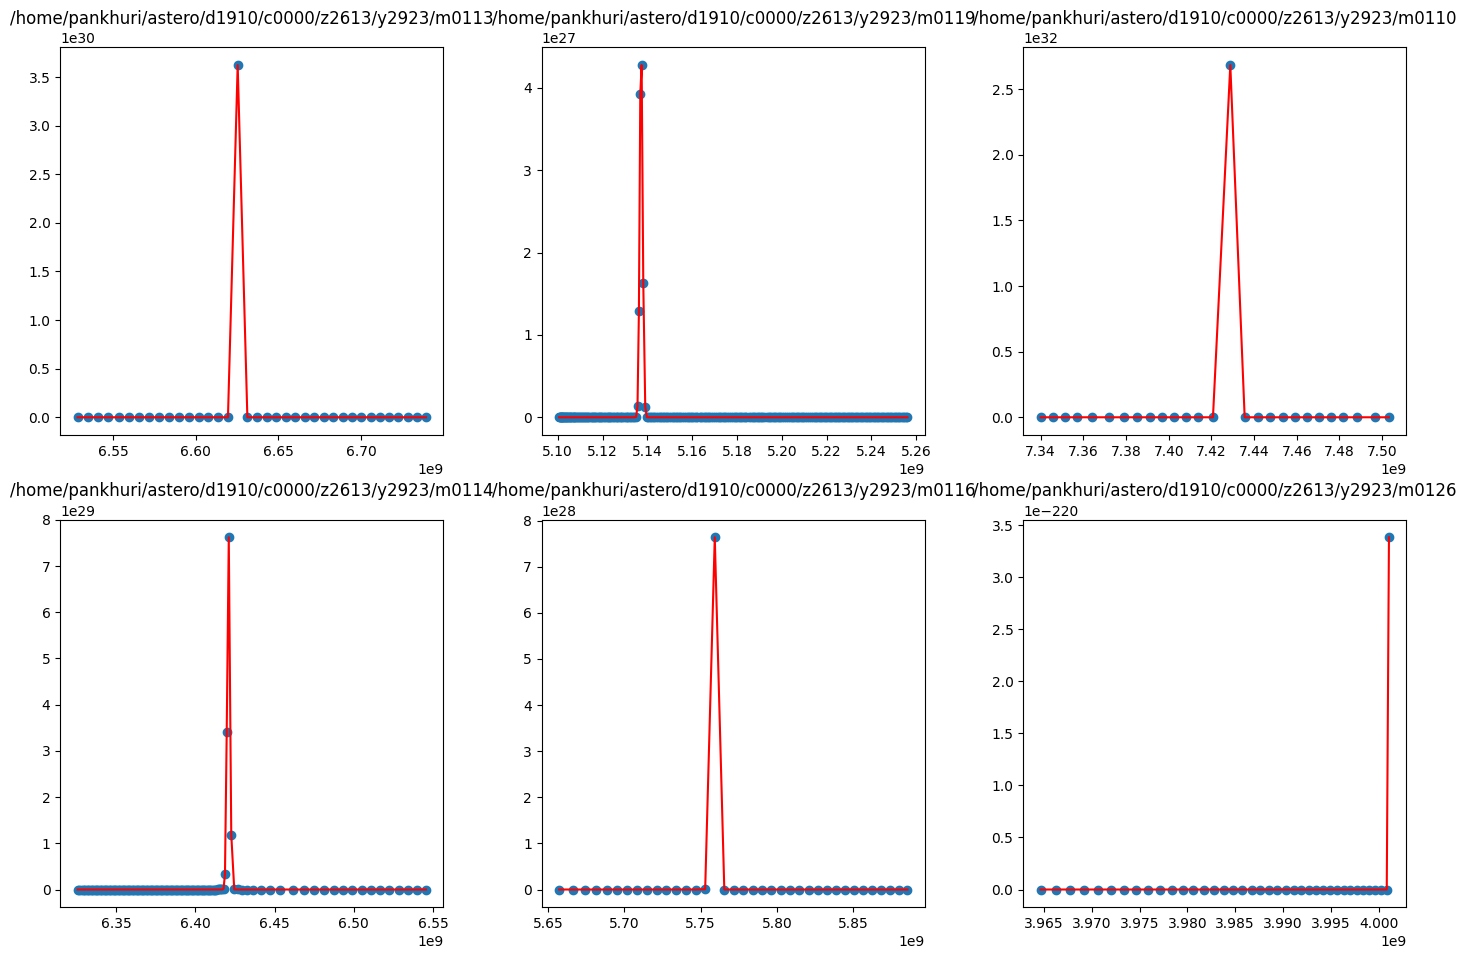

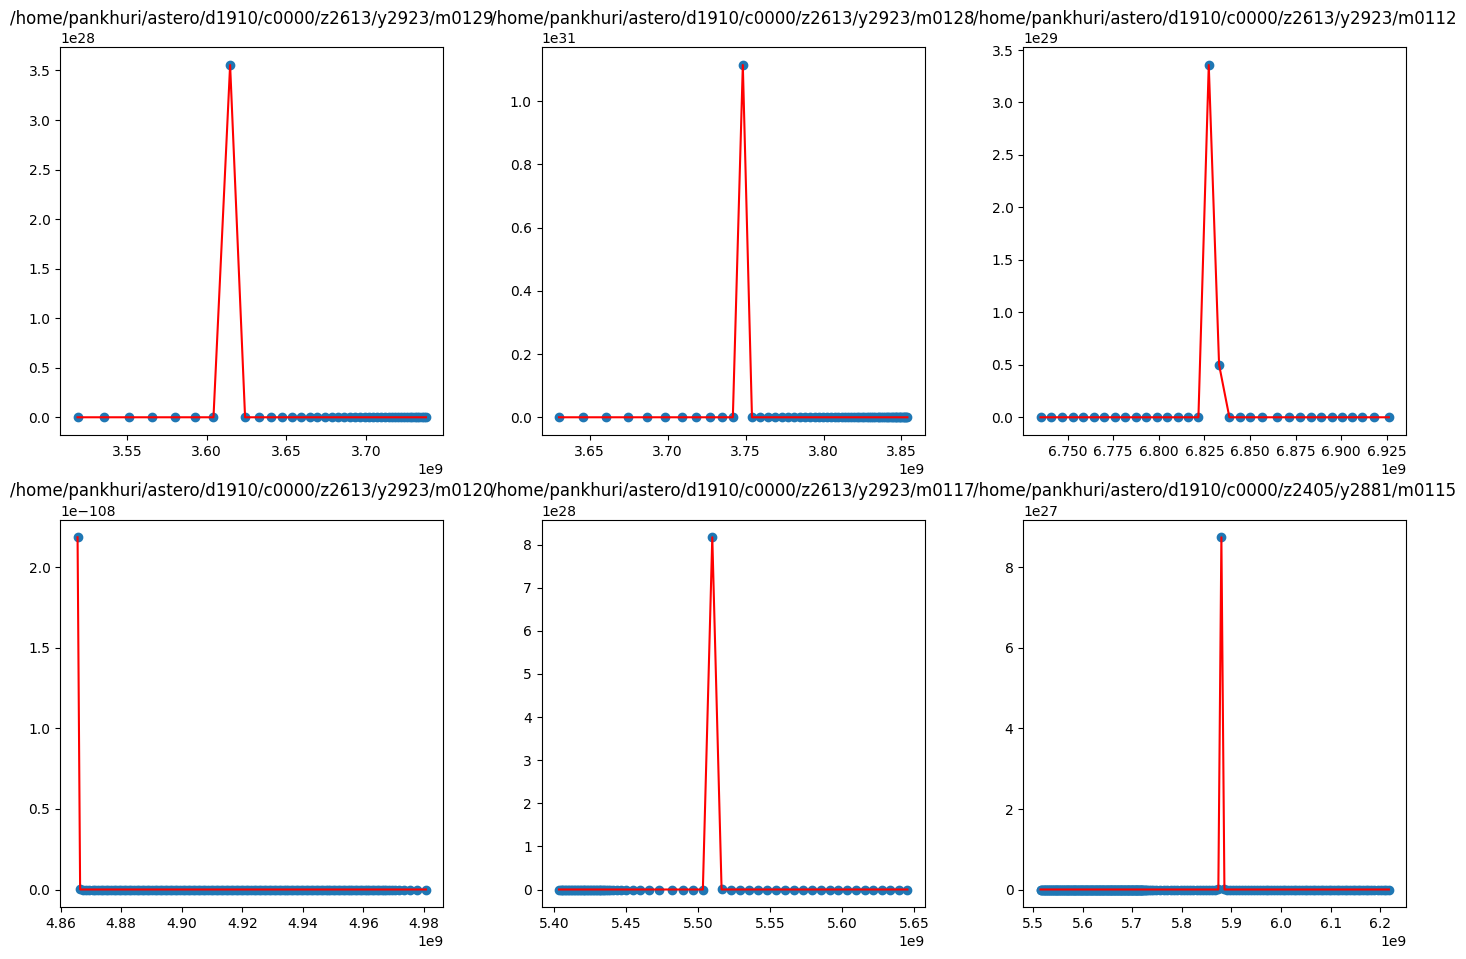

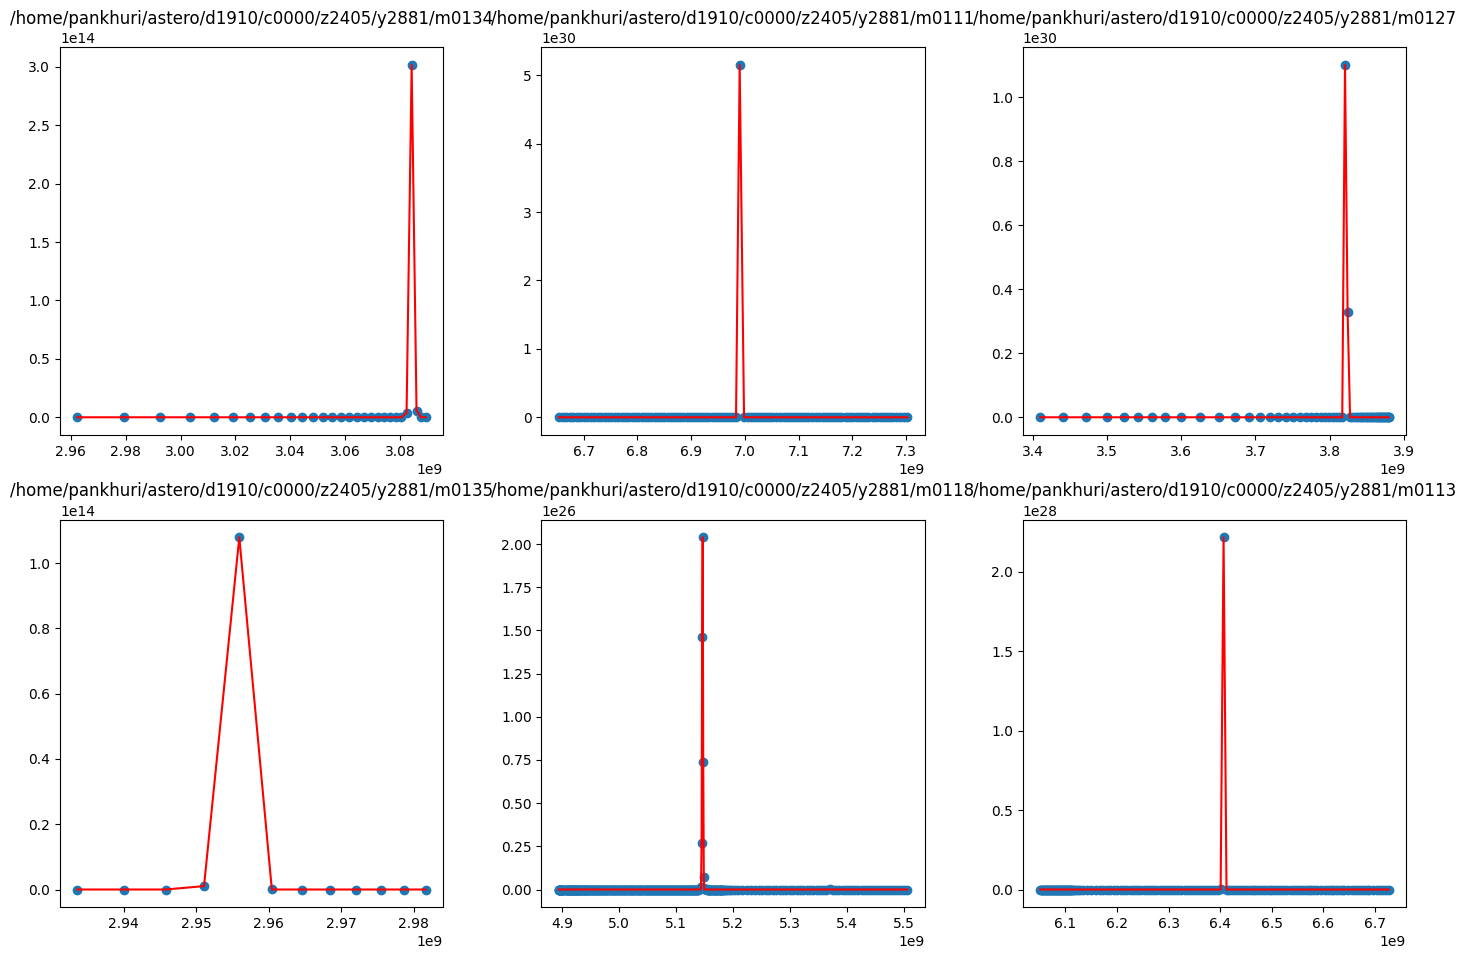

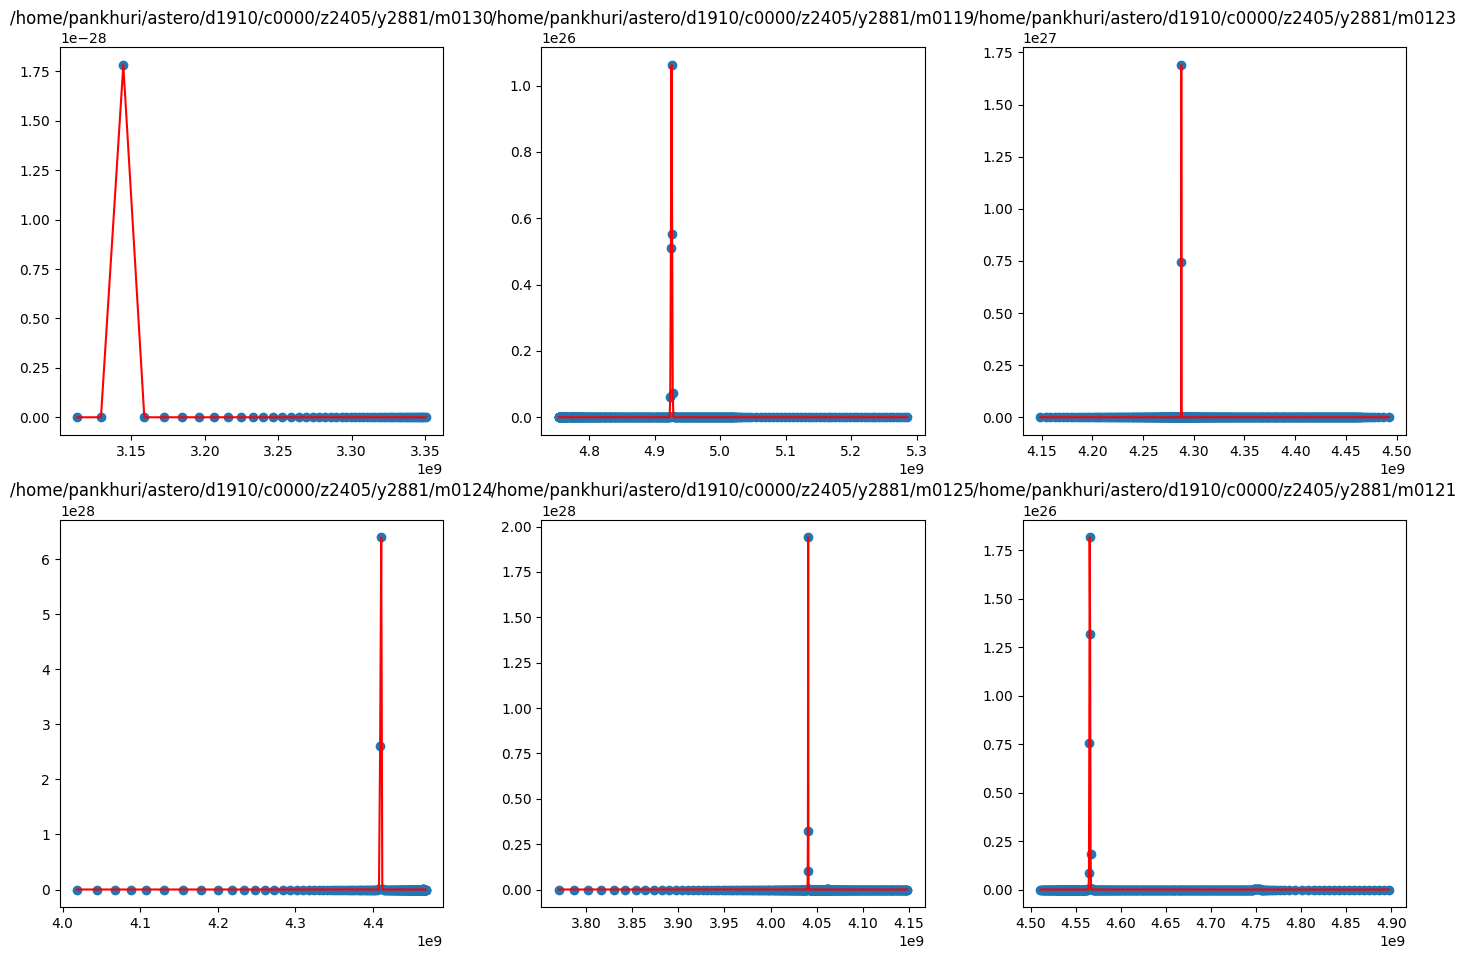

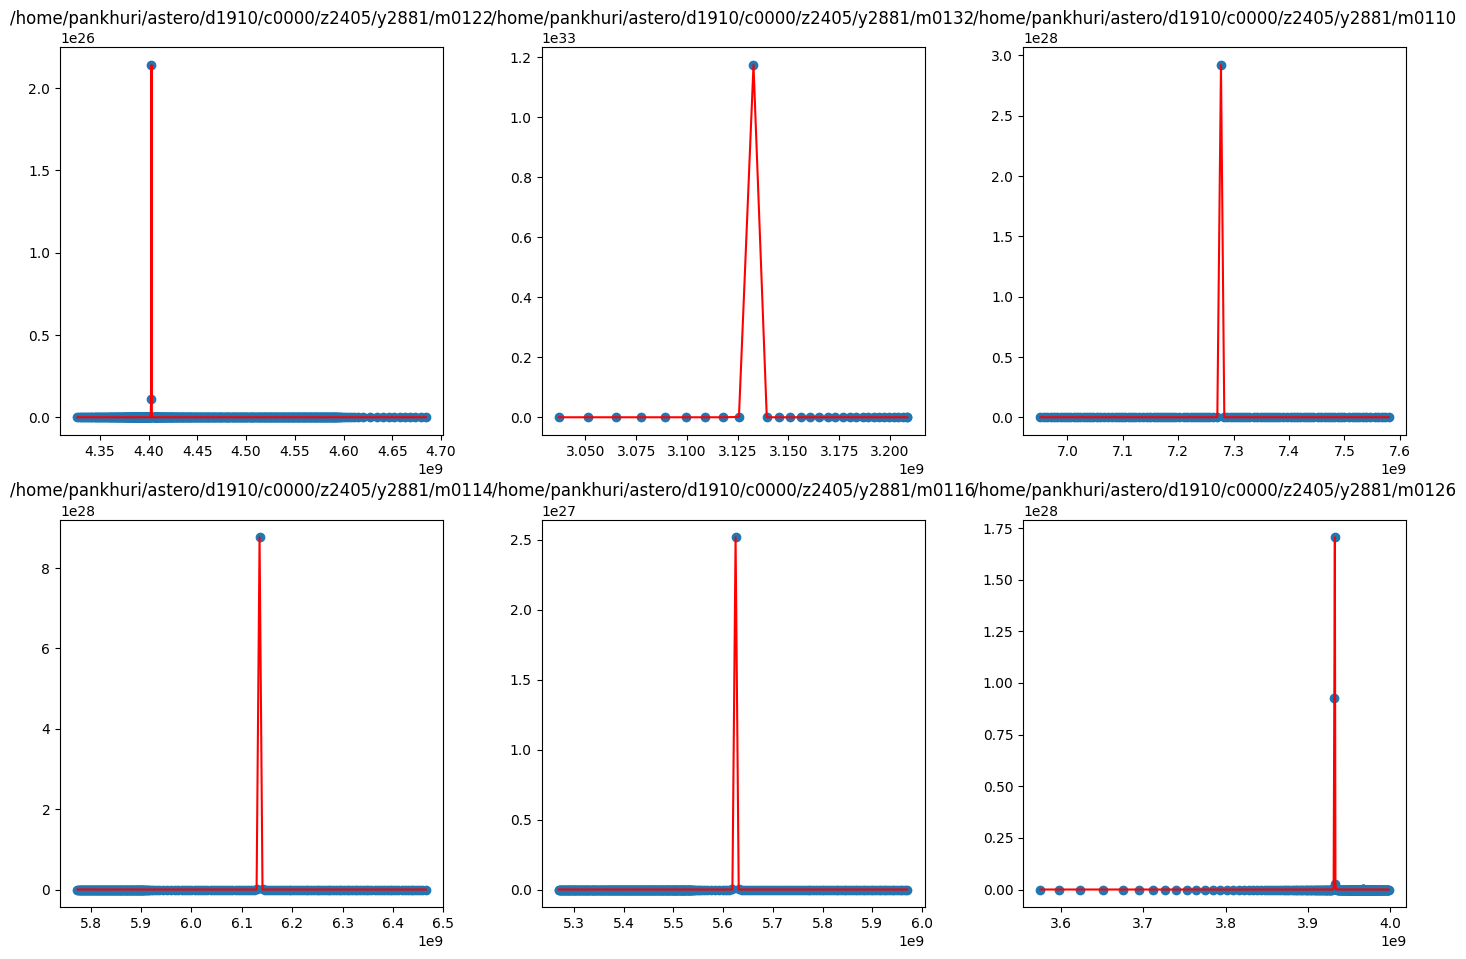

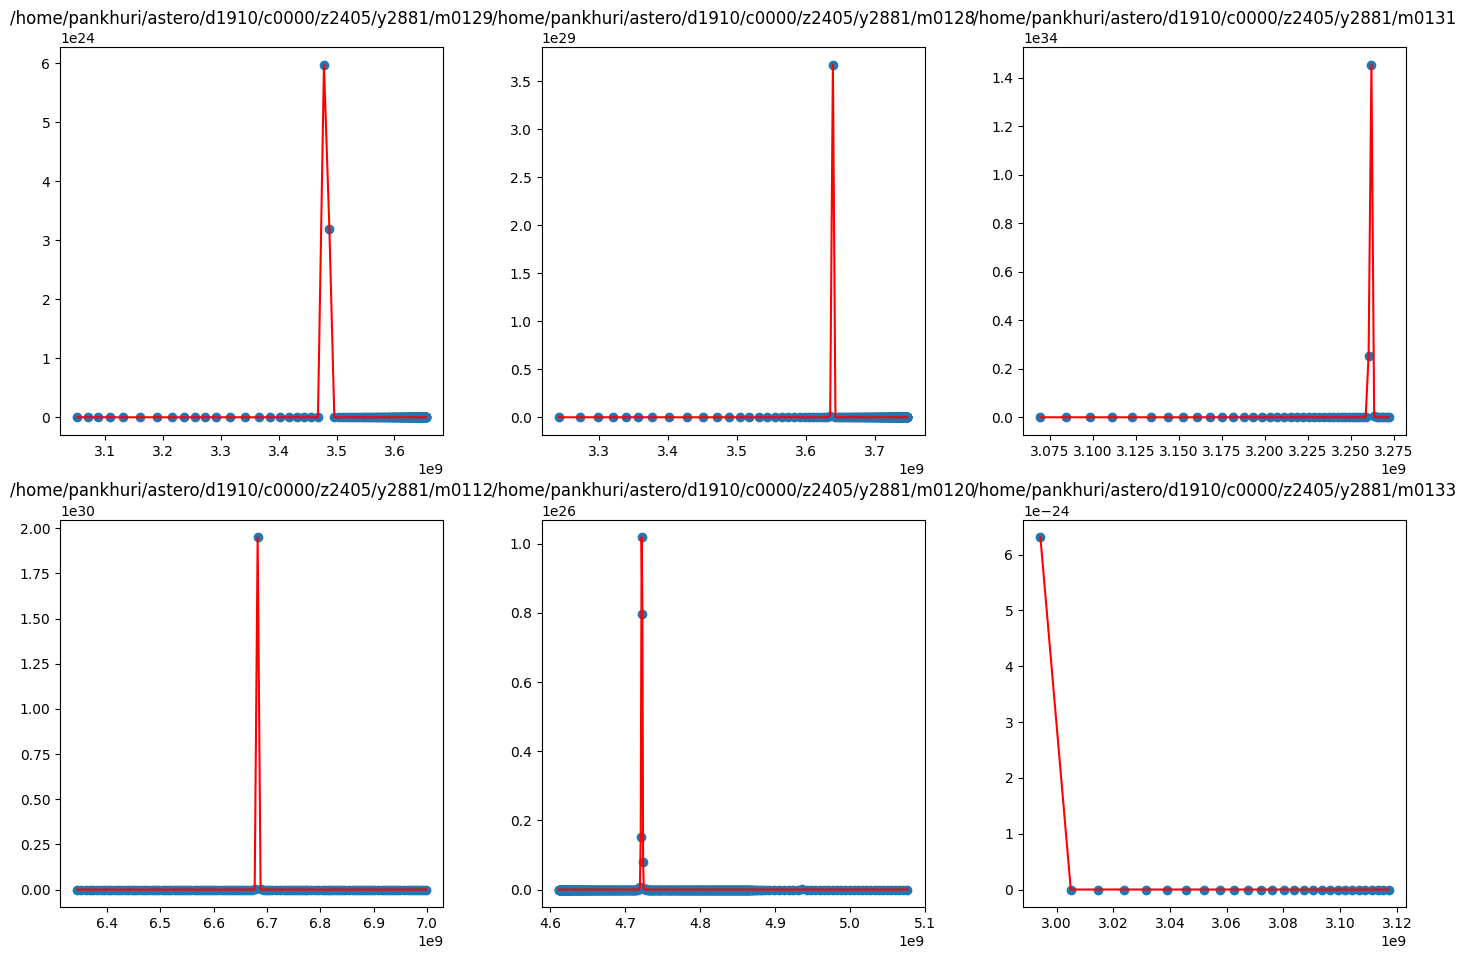

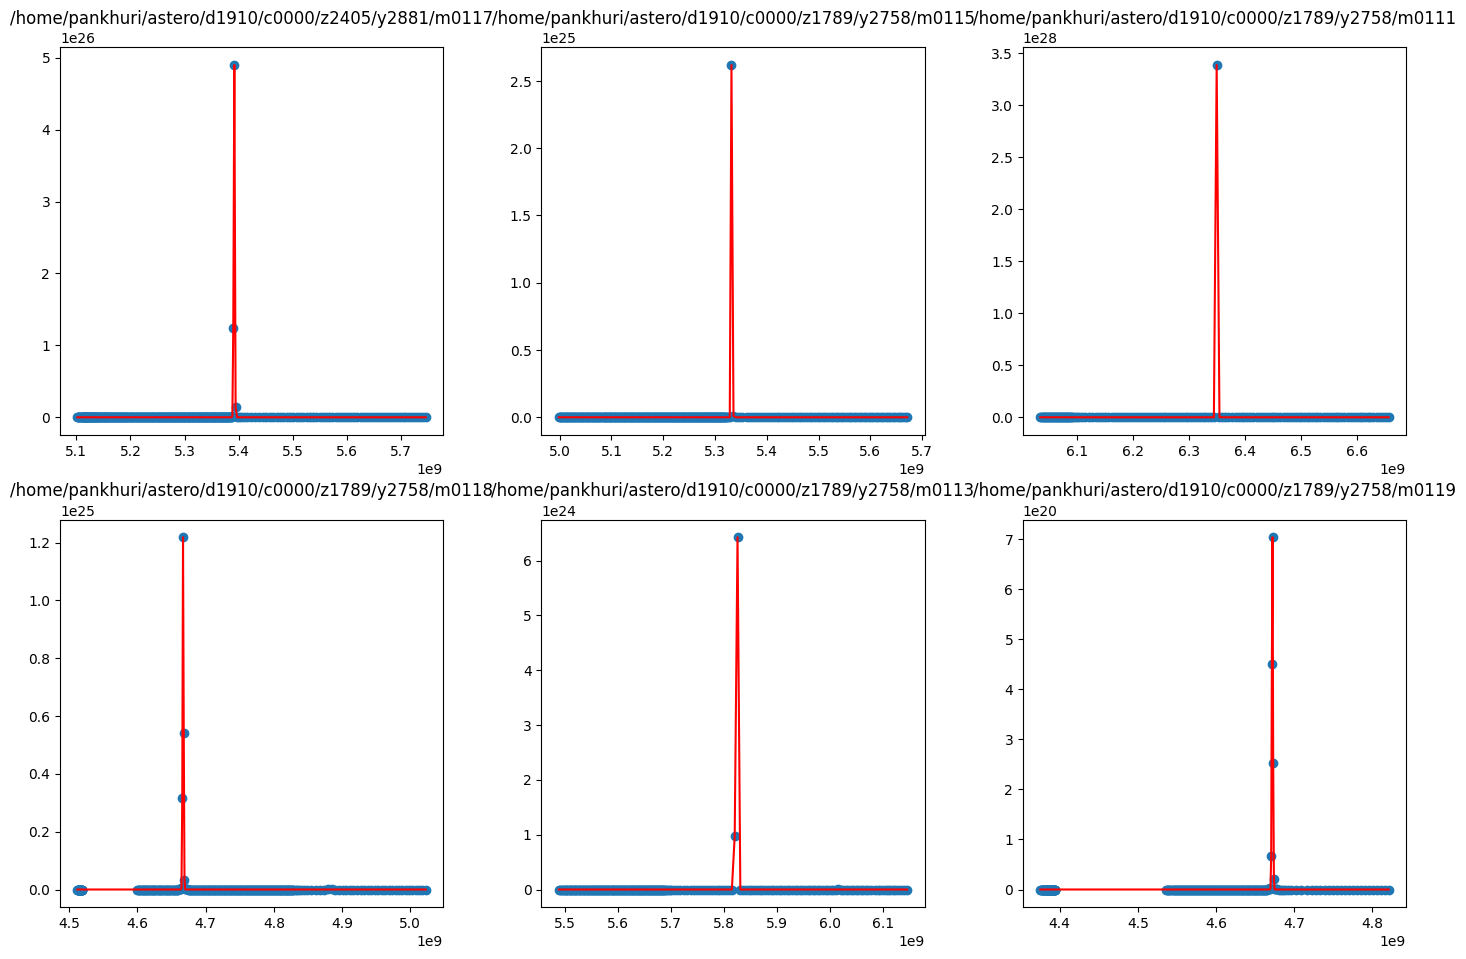

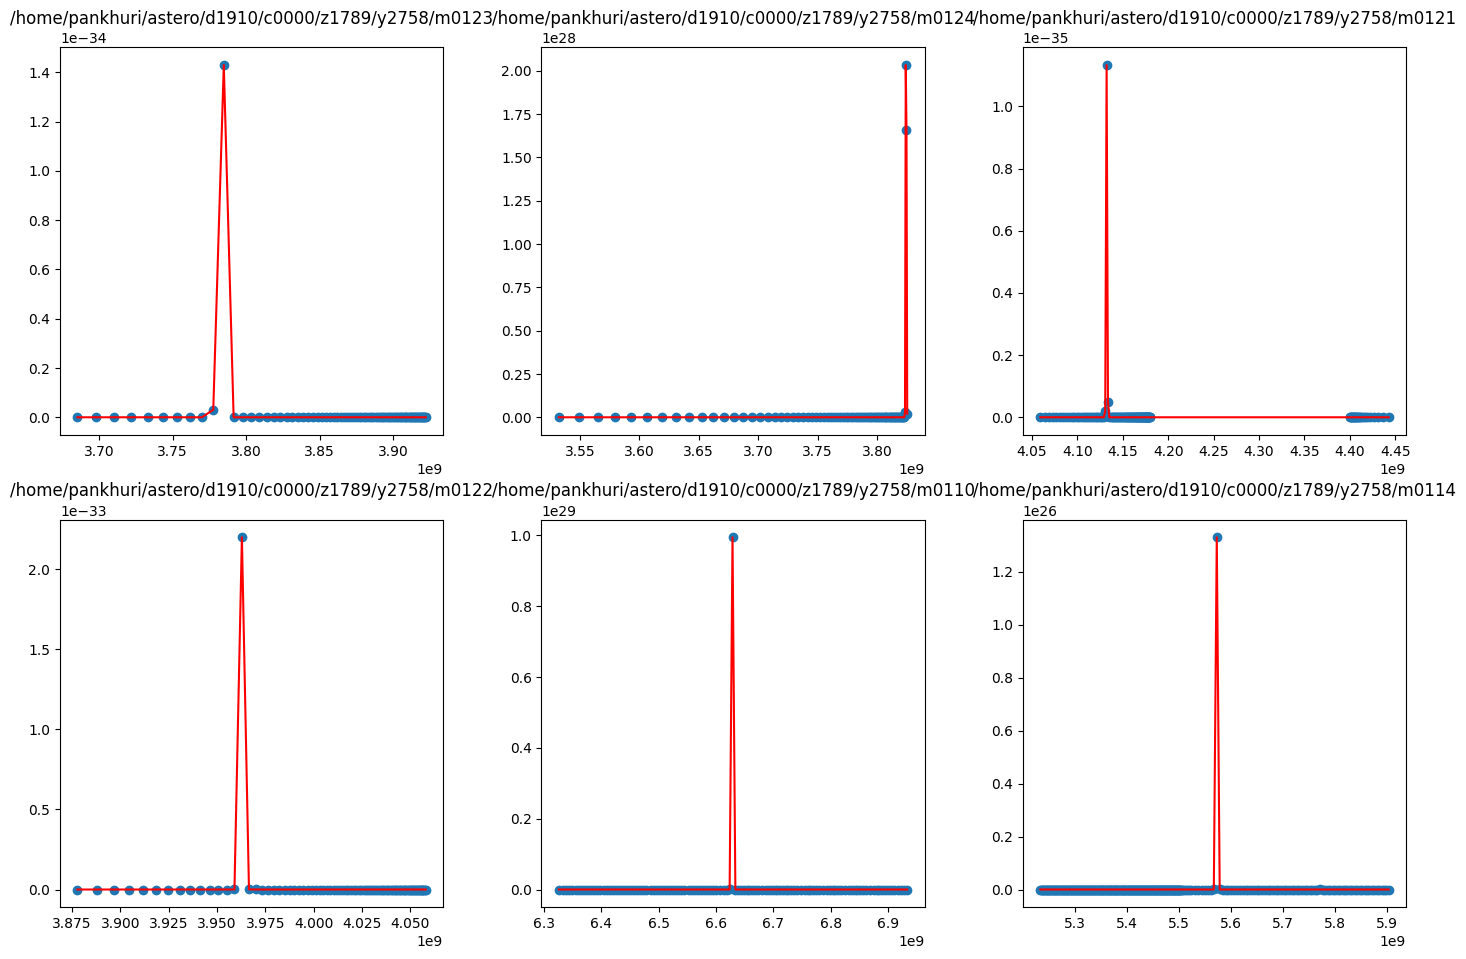

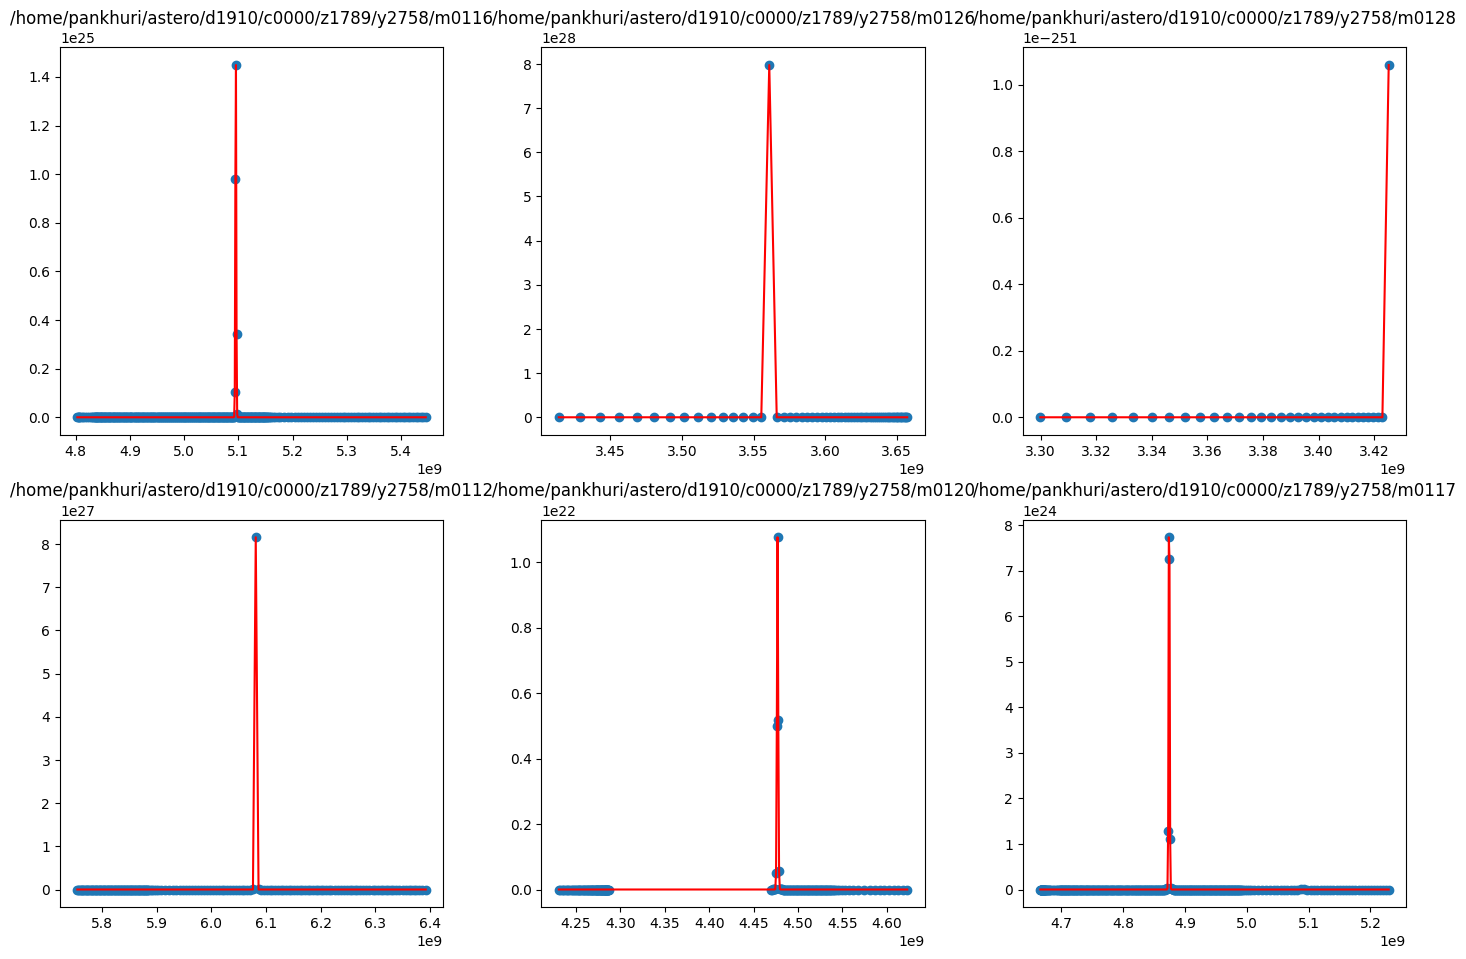

In [14]:
import matplotlib.pyplot as plt
plots_per_figure = 6
num_plots = len(star_age)

for i in range(0, num_plots, plots_per_figure):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
    fig.tight_layout(pad=4.0)
    
    for j in range(plots_per_figure):
        index = i + j
        if index >= num_plots:
            break
        ax = axes[j // 3, j % 3]
        ax.scatter(star_age[index], post[index])
        ax.plot(star_age[index], post[index], color='red')
        ax.set_title(final[index])
    
    plt.show()

# Residuals

In [15]:
from collections import defaultdict

def match_frequencies_ladder(observed_freqs, observed_l_vals, model_freqs, model_l_vals):
    observed_dict = defaultdict(list)
    model_dict = defaultdict(list)
    for freq, l in zip(observed_freqs, observed_l_vals):
        observed_dict[l].append(freq)
    for freq, l in zip(model_freqs, model_l_vals):
        model_dict[l].append(freq)
    matches = []
    
    for l in observed_dict:
        if l in model_dict:
            obs_freqs = sorted(observed_dict[l], reverse=True)
            mod_freqs = sorted(model_dict[l], reverse=True)
            for obs_freq in obs_freqs:
                min_residual = float('inf')
                best_match = None
                for mod_freq in mod_freqs:
                    residual = obs_freq - mod_freq
                    if residual < min_residual:
                        min_residual = abs(residual)
                        best_match = mod_freq
                matches.append((l, obs_freq, best_match))
                mod_freqs.remove(best_match)
    
    return matches
observed_freqs = of
observed_l_vals = lof
model_freqs = f[0][np.argmax(post[0])]/1000000
model_l_vals =l[0][np.argmax(post[0])]
matches = match_frequencies_ladder(observed_freqs, observed_l_vals, model_freqs, model_l_vals)
x=[]
y=[]
for match in matches:
    ll, obs_freq, mod_freq = match
    x.append(obs_freq)
    y.append(mod_freq)
#     print(f"l={ll}: Observed={obs_freq}, Model={mod_freq}")

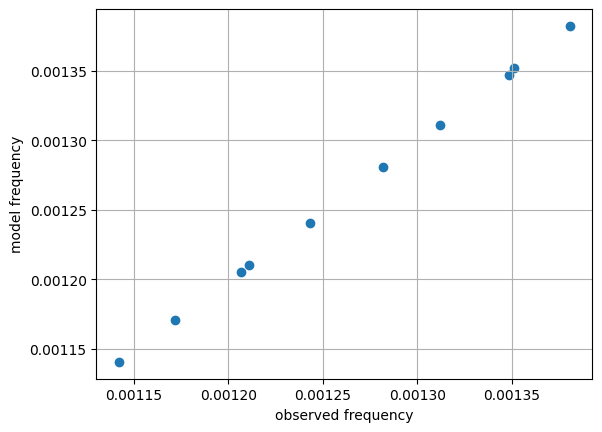

In [16]:
z=[(x-y) for x,y in zip(x,y)] 
plt.scatter(x,y)
plt.xlabel("observed frequency")
plt.ylabel("model frequency")
plt.grid()
plt.show()

In [17]:
for j in range(len(x)):
    print(f"Observed={x[j]}, Model={y[j]}, Residuals={z[j]}")

Observed=0.00135117, Model=0.001352040437082747, Residuals=-8.704370827469863e-07
Observed=0.0012820499999999999, Model=0.001280849970935241, Residuals=1.2000290647588754e-06
Observed=0.0012113, Model=0.0012101957296724978, Residuals=1.1042703275021722e-06
Observed=0.00114223, Model=0.001140540603270047, Residuals=1.6893967299529567e-06
Observed=0.00138081, Model=0.001382228528218201, Residuals=-1.418528218201159e-06
Observed=0.00131227, Model=0.001311300638296499, Residuals=9.69361703500888e-07
Observed=0.00124336, Model=0.00124048809774437, Residuals=2.871902255630011e-06
Observed=0.0011718, Model=0.001170367259062523, Residuals=1.4327409374769503e-06
Observed=0.0013486700000000002, Model=0.001346961300643625, Residuals=1.7086993563751162e-06
Observed=0.00120695, Model=0.0012051734426098502, Residuals=1.7765573901498688e-06


In [19]:
sorted_errors = [error[np.where(of == value)[0][0]] for value in x]

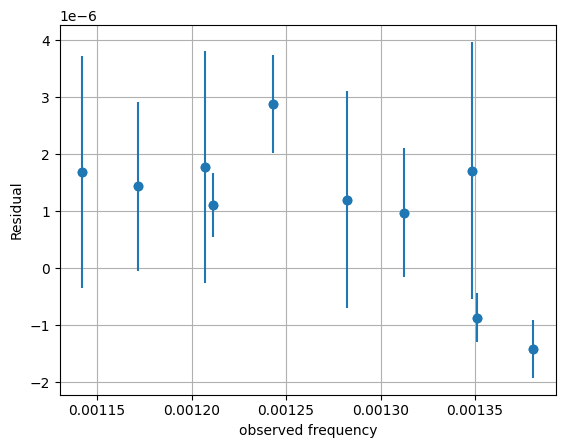

In [20]:
plt.scatter(x,z)
plt.errorbar(x,z,yerr=sorted_errors,fmt='o')
plt.grid()
plt.xlabel("observed frequency")
plt.ylabel("Residual")
plt.show()